NZ Locations Explained

cr: Cape Reinga (-34.25, 172.25)

mg: Mauraki Gulf (-36.75, 175.250

bop: Bay of Plenty (-37.25, 176.75)

r: Raglan (-37.75, 174.750

t: Taranaki (-38.75, 174.25)

cs: Cook Strait (-40.75, 174.25)

w: Wairarapa (-41.25, 176.25)

ci: Chatham Island (-43.75 -176.75)

bp: Bank Peninsula (-43.75, 173.25)

f: Fiordland (-44.25, 167.25)

op: Otago Peninsula (-45.75, 170.75)

si: Stewart Island (-47.25, 167.75)

In [7]:
from google.colab import drive
drive.mount("/gdrive", force_remount=True)

!cp -r "/gdrive/MyDrive/SSTA NZ" "/content/"
!cp -r "/gdrive/MyDrive/SSTA Non NZ" "/content/"

Mounted at /gdrive


In [34]:
import glob
import os

import numpy as np

import torch
import torch.nn as nn
import torch.nn.functional as F

import time

import matplotlib.pyplot as plt

import pandas as pd

dir_path = '/content/SSTA NZ'
nz = {}
for npy_file in glob.glob(os.path.join(dir_path, '*.npy')):
    array = np.load(npy_file)
    filename = os.path.splitext(os.path.basename(npy_file))[0][2:]
    nz[filename] = array

dir_path = '/content/SSTA Non NZ'
non_nz = {}
for npy_file in glob.glob(os.path.join(dir_path, '*.npy')):
    array = np.load(npy_file)
    filename = os.path.splitext(os.path.basename(npy_file))[0][2:]
    non_nz[filename] = array

dir_path = '/content/SSTA NZ'

# Merge the two dictionaries into one predictor dictionary.
predictors = {}
predictors.update(nz)
predictors.update(non_nz)

In [53]:
from scipy.stats import shapiro

# Shapiro-Wilk Test (1965)
for loc in sorted(list(nz.keys())):
    print('{}, mean: {:.4f}, std: {:.4f}'.format(loc.upper(), np.mean(nz[loc]), np.std(nz[loc])))
    stat, p = shapiro(nz[loc])
    if p > 0.05:
        print("The array is normally distributed at a significance level of 0.05.")
    else:
        print("The array is not normally distributed at a significance level of 0.05.")

BOP, mean: 0.0539, std: 0.8376
The array is normally distributed at a significance level of 0.05.
BP, mean: -0.0291, std: 0.8573
The array is not normally distributed at a significance level of 0.05.
CI, mean: -0.0170, std: 0.9278
The array is not normally distributed at a significance level of 0.05.
CR, mean: 0.0652, std: 0.8237
The array is not normally distributed at a significance level of 0.05.
CS, mean: 0.0286, std: 0.6657
The array is normally distributed at a significance level of 0.05.
F, mean: 0.0519, std: 0.9631
The array is not normally distributed at a significance level of 0.05.
MG, mean: 0.0490, std: 0.8536
The array is normally distributed at a significance level of 0.05.
OP, mean: -0.0091, std: 0.7822
The array is not normally distributed at a significance level of 0.05.
R, mean: 0.0792, std: 0.8447
The array is not normally distributed at a significance level of 0.05.
SI, mean: 0.0053, std: 0.8000
The array is not normally distributed at a significance level of 0.05.


Location: R
90th Threshold: 1.0772673
80th Threshold: 0.7263537
Training Model 1
Epoch [20/400], Avg Loss: 4.7322,  Val MSE: 0.2763
Epoch [40/400], Avg Loss: 0.9386,  Val MSE: 0.2474
Epoch [60/400], Avg Loss: 0.5438,  Val MSE: 0.2286
Epoch [80/400], Avg Loss: 0.4664,  Val MSE: 0.2249
Epoch [100/400], Avg Loss: 0.4280,  Val MSE: 0.2234
Epoch [120/400], Avg Loss: 0.4045,  Val MSE: 0.2227
Epoch [140/400], Avg Loss: 0.3898,  Val MSE: 0.2230
Epoch [160/400], Avg Loss: 0.3780,  Val MSE: 0.2239
Epoch [180/400], Avg Loss: 0.3705,  Val MSE: 0.2244
Epoch [200/400], Avg Loss: 0.3658,  Val MSE: 0.2247
Epoch [220/400], Avg Loss: 0.3626,  Val MSE: 0.2249
Epoch [240/400], Avg Loss: 0.3591,  Val MSE: 0.2251
Epoch [260/400], Avg Loss: 0.3558,  Val MSE: 0.2253
Epoch [280/400], Avg Loss: 0.3527,  Val MSE: 0.2255
Epoch [300/400], Avg Loss: 0.3504,  Val MSE: 0.2257
Epoch [320/400], Avg Loss: 0.3490,  Val MSE: 0.2260
Epoch [340/400], Avg Loss: 0.3478,  Val MSE: 0.2262
Epoch [360/400], Avg Loss: 0.3465,  Val

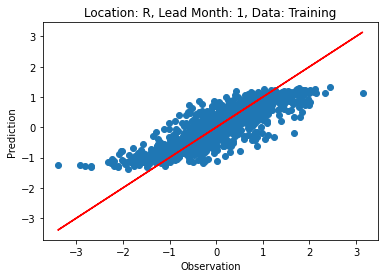

Training Model 2
Epoch [20/400], Avg Loss: 4.7959,  Val MSE: 0.2824
Epoch [40/400], Avg Loss: 0.9204,  Val MSE: 0.2502
Epoch [60/400], Avg Loss: 0.5556,  Val MSE: 0.2316
Epoch [80/400], Avg Loss: 0.4734,  Val MSE: 0.2271
Epoch [100/400], Avg Loss: 0.4319,  Val MSE: 0.2247
Epoch [120/400], Avg Loss: 0.4093,  Val MSE: 0.2235
Epoch [140/400], Avg Loss: 0.3959,  Val MSE: 0.2238
Epoch [160/400], Avg Loss: 0.3856,  Val MSE: 0.2251
Epoch [180/400], Avg Loss: 0.3756,  Val MSE: 0.2261
Epoch [200/400], Avg Loss: 0.3673,  Val MSE: 0.2264
Epoch [220/400], Avg Loss: 0.3600,  Val MSE: 0.2266
Epoch [240/400], Avg Loss: 0.3552,  Val MSE: 0.2266
Epoch [260/400], Avg Loss: 0.3518,  Val MSE: 0.2266
Epoch [280/400], Avg Loss: 0.3498,  Val MSE: 0.2267
Epoch [300/400], Avg Loss: 0.3489,  Val MSE: 0.2266
Epoch [320/400], Avg Loss: 0.3480,  Val MSE: 0.2265
Epoch [340/400], Avg Loss: 0.3469,  Val MSE: 0.2266
Epoch [360/400], Avg Loss: 0.3461,  Val MSE: 0.2265
Epoch [380/400], Avg Loss: 0.3456,  Val MSE: 0.2265

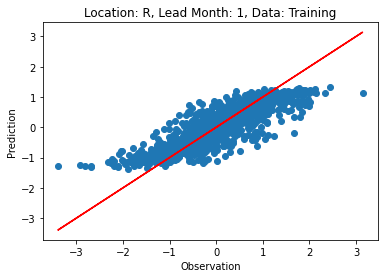

Training Model 3
Epoch [20/400], Avg Loss: 4.7428,  Val MSE: 0.2806
Epoch [40/400], Avg Loss: 0.9344,  Val MSE: 0.2538
Epoch [60/400], Avg Loss: 0.5357,  Val MSE: 0.2337
Epoch [80/400], Avg Loss: 0.4560,  Val MSE: 0.2279
Epoch [100/400], Avg Loss: 0.4203,  Val MSE: 0.2258
Epoch [120/400], Avg Loss: 0.3992,  Val MSE: 0.2247
Epoch [140/400], Avg Loss: 0.3840,  Val MSE: 0.2255
Epoch [160/400], Avg Loss: 0.3716,  Val MSE: 0.2262
Epoch [180/400], Avg Loss: 0.3620,  Val MSE: 0.2264
Epoch [200/400], Avg Loss: 0.3550,  Val MSE: 0.2264
Epoch [220/400], Avg Loss: 0.3500,  Val MSE: 0.2266
Epoch [240/400], Avg Loss: 0.3460,  Val MSE: 0.2269
Epoch [260/400], Avg Loss: 0.3435,  Val MSE: 0.2270
Epoch [280/400], Avg Loss: 0.3417,  Val MSE: 0.2272
Epoch [300/400], Avg Loss: 0.3397,  Val MSE: 0.2273
Epoch [320/400], Avg Loss: 0.3377,  Val MSE: 0.2274
Epoch [340/400], Avg Loss: 0.3359,  Val MSE: 0.2275
Epoch [360/400], Avg Loss: 0.3342,  Val MSE: 0.2276
Epoch [380/400], Avg Loss: 0.3331,  Val MSE: 0.2278

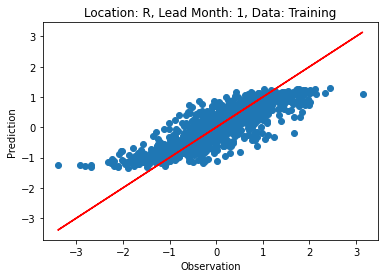

Training Model 4
Epoch [20/400], Avg Loss: 4.7370,  Val MSE: 0.2727
Epoch [40/400], Avg Loss: 0.9534,  Val MSE: 0.2480
Epoch [60/400], Avg Loss: 0.5713,  Val MSE: 0.2299
Epoch [80/400], Avg Loss: 0.4913,  Val MSE: 0.2251
Epoch [100/400], Avg Loss: 0.4482,  Val MSE: 0.2227
Epoch [120/400], Avg Loss: 0.4257,  Val MSE: 0.2222
Epoch [140/400], Avg Loss: 0.4108,  Val MSE: 0.2217
Epoch [160/400], Avg Loss: 0.3983,  Val MSE: 0.2221
Epoch [180/400], Avg Loss: 0.3896,  Val MSE: 0.2228
Epoch [200/400], Avg Loss: 0.3833,  Val MSE: 0.2236
Epoch [220/400], Avg Loss: 0.3773,  Val MSE: 0.2242
Epoch [240/400], Avg Loss: 0.3722,  Val MSE: 0.2247
Epoch [260/400], Avg Loss: 0.3673,  Val MSE: 0.2250
Epoch [280/400], Avg Loss: 0.3626,  Val MSE: 0.2254
Epoch [300/400], Avg Loss: 0.3582,  Val MSE: 0.2257
Epoch [320/400], Avg Loss: 0.3547,  Val MSE: 0.2258
Epoch [340/400], Avg Loss: 0.3519,  Val MSE: 0.2258
Epoch [360/400], Avg Loss: 0.3497,  Val MSE: 0.2259
Epoch [380/400], Avg Loss: 0.3485,  Val MSE: 0.2258

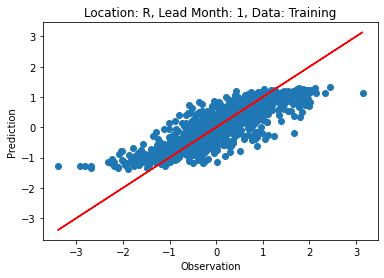

Training Model 5
Epoch [20/400], Avg Loss: 4.7374,  Val MSE: 0.2795
Epoch [40/400], Avg Loss: 0.9649,  Val MSE: 0.2508
Epoch [60/400], Avg Loss: 0.5769,  Val MSE: 0.2307
Epoch [80/400], Avg Loss: 0.4953,  Val MSE: 0.2267
Epoch [100/400], Avg Loss: 0.4535,  Val MSE: 0.2241
Epoch [120/400], Avg Loss: 0.4244,  Val MSE: 0.2237
Epoch [140/400], Avg Loss: 0.4035,  Val MSE: 0.2235
Epoch [160/400], Avg Loss: 0.3893,  Val MSE: 0.2244
Epoch [180/400], Avg Loss: 0.3789,  Val MSE: 0.2255
Epoch [200/400], Avg Loss: 0.3713,  Val MSE: 0.2259
Epoch [220/400], Avg Loss: 0.3656,  Val MSE: 0.2262
Epoch [240/400], Avg Loss: 0.3615,  Val MSE: 0.2265
Epoch [260/400], Avg Loss: 0.3576,  Val MSE: 0.2267
Epoch [280/400], Avg Loss: 0.3545,  Val MSE: 0.2267
Epoch [300/400], Avg Loss: 0.3515,  Val MSE: 0.2269
Epoch [320/400], Avg Loss: 0.3500,  Val MSE: 0.2268
Epoch [340/400], Avg Loss: 0.3493,  Val MSE: 0.2270
Epoch [360/400], Avg Loss: 0.3488,  Val MSE: 0.2271
Epoch [380/400], Avg Loss: 0.3482,  Val MSE: 0.2272

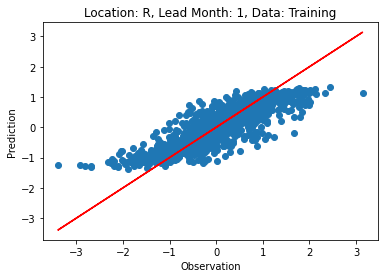

Location: R
Persistence MSE: 0.2377
Test MSE: 0.2270
Persist CSI: 0.5158
Persist CSI 80: 0.6259
Test CSI: 0.2055
Test CSI 80: 0.5938


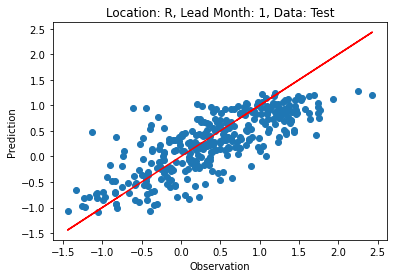

Location: CS
90th Threshold: 0.9103391
80th Threshold: 0.5539276
Training Model 1
Epoch [20/400], Avg Loss: 4.6238,  Val MSE: 0.2088
Epoch [40/400], Avg Loss: 0.8492,  Val MSE: 0.1998
Epoch [60/400], Avg Loss: 0.4370,  Val MSE: 0.1666
Epoch [80/400], Avg Loss: 0.3522,  Val MSE: 0.1501
Epoch [100/400], Avg Loss: 0.3159,  Val MSE: 0.1381
Epoch [120/400], Avg Loss: 0.2970,  Val MSE: 0.1305
Epoch [140/400], Avg Loss: 0.2844,  Val MSE: 0.1263
Epoch [160/400], Avg Loss: 0.2743,  Val MSE: 0.1243
Epoch [180/400], Avg Loss: 0.2655,  Val MSE: 0.1236
Epoch [200/400], Avg Loss: 0.2571,  Val MSE: 0.1233
Epoch [220/400], Avg Loss: 0.2491,  Val MSE: 0.1230
Epoch [240/400], Avg Loss: 0.2415,  Val MSE: 0.1227
Epoch [260/400], Avg Loss: 0.2355,  Val MSE: 0.1225
Epoch [280/400], Avg Loss: 0.2307,  Val MSE: 0.1223
Epoch [300/400], Avg Loss: 0.2269,  Val MSE: 0.1224
Epoch [320/400], Avg Loss: 0.2234,  Val MSE: 0.1224
Epoch [340/400], Avg Loss: 0.2206,  Val MSE: 0.1226
Epoch [360/400], Avg Loss: 0.2184,  Va

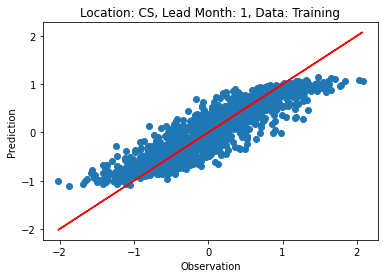

Training Model 2
Epoch [20/400], Avg Loss: 4.6215,  Val MSE: 0.2034
Epoch [40/400], Avg Loss: 0.8164,  Val MSE: 0.1937
Epoch [60/400], Avg Loss: 0.4096,  Val MSE: 0.1708
Epoch [80/400], Avg Loss: 0.3293,  Val MSE: 0.1513
Epoch [100/400], Avg Loss: 0.2952,  Val MSE: 0.1371
Epoch [120/400], Avg Loss: 0.2755,  Val MSE: 0.1288
Epoch [140/400], Avg Loss: 0.2610,  Val MSE: 0.1254
Epoch [160/400], Avg Loss: 0.2497,  Val MSE: 0.1244
Epoch [180/400], Avg Loss: 0.2408,  Val MSE: 0.1242
Epoch [200/400], Avg Loss: 0.2328,  Val MSE: 0.1239
Epoch [220/400], Avg Loss: 0.2249,  Val MSE: 0.1238
Epoch [240/400], Avg Loss: 0.2176,  Val MSE: 0.1236
Epoch [260/400], Avg Loss: 0.2124,  Val MSE: 0.1234
Epoch [280/400], Avg Loss: 0.2081,  Val MSE: 0.1233
Epoch [300/400], Avg Loss: 0.2047,  Val MSE: 0.1232
Epoch [320/400], Avg Loss: 0.2018,  Val MSE: 0.1232
Epoch [340/400], Avg Loss: 0.1995,  Val MSE: 0.1232
Epoch [360/400], Avg Loss: 0.1980,  Val MSE: 0.1232
Epoch [380/400], Avg Loss: 0.1965,  Val MSE: 0.1233

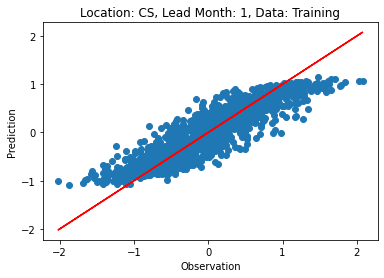

Training Model 3
Epoch [20/400], Avg Loss: 4.6427,  Val MSE: 0.2064
Epoch [40/400], Avg Loss: 0.8105,  Val MSE: 0.1927
Epoch [60/400], Avg Loss: 0.3837,  Val MSE: 0.1629
Epoch [80/400], Avg Loss: 0.3078,  Val MSE: 0.1440
Epoch [100/400], Avg Loss: 0.2746,  Val MSE: 0.1315
Epoch [120/400], Avg Loss: 0.2565,  Val MSE: 0.1253
Epoch [140/400], Avg Loss: 0.2448,  Val MSE: 0.1234
Epoch [160/400], Avg Loss: 0.2354,  Val MSE: 0.1227
Epoch [180/400], Avg Loss: 0.2292,  Val MSE: 0.1224
Epoch [200/400], Avg Loss: 0.2254,  Val MSE: 0.1224
Epoch [220/400], Avg Loss: 0.2220,  Val MSE: 0.1224
Epoch [240/400], Avg Loss: 0.2188,  Val MSE: 0.1224
Epoch [260/400], Avg Loss: 0.2159,  Val MSE: 0.1223
Epoch [280/400], Avg Loss: 0.2123,  Val MSE: 0.1222
Epoch [300/400], Avg Loss: 0.2096,  Val MSE: 0.1221
Epoch [320/400], Avg Loss: 0.2086,  Val MSE: 0.1222
Epoch [340/400], Avg Loss: 0.2078,  Val MSE: 0.1222
Epoch [360/400], Avg Loss: 0.2070,  Val MSE: 0.1224
Epoch [380/400], Avg Loss: 0.2060,  Val MSE: 0.1224

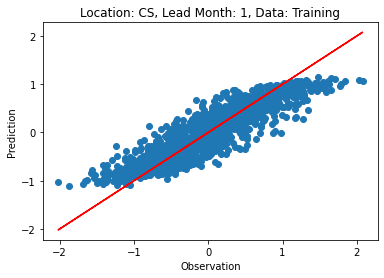

Training Model 4
Epoch [20/400], Avg Loss: 4.6337,  Val MSE: 0.2101
Epoch [40/400], Avg Loss: 0.8021,  Val MSE: 0.1921
Epoch [60/400], Avg Loss: 0.3892,  Val MSE: 0.1657
Epoch [80/400], Avg Loss: 0.3220,  Val MSE: 0.1501
Epoch [100/400], Avg Loss: 0.2877,  Val MSE: 0.1366
Epoch [120/400], Avg Loss: 0.2640,  Val MSE: 0.1278
Epoch [140/400], Avg Loss: 0.2490,  Val MSE: 0.1242
Epoch [160/400], Avg Loss: 0.2396,  Val MSE: 0.1231
Epoch [180/400], Avg Loss: 0.2324,  Val MSE: 0.1228
Epoch [200/400], Avg Loss: 0.2258,  Val MSE: 0.1226
Epoch [220/400], Avg Loss: 0.2207,  Val MSE: 0.1223
Epoch [240/400], Avg Loss: 0.2162,  Val MSE: 0.1221
Epoch [260/400], Avg Loss: 0.2134,  Val MSE: 0.1220
Epoch [280/400], Avg Loss: 0.2112,  Val MSE: 0.1218
Epoch [300/400], Avg Loss: 0.2091,  Val MSE: 0.1219
Epoch [320/400], Avg Loss: 0.2073,  Val MSE: 0.1219
Epoch [340/400], Avg Loss: 0.2060,  Val MSE: 0.1219
Epoch [360/400], Avg Loss: 0.2051,  Val MSE: 0.1219
Epoch [380/400], Avg Loss: 0.2044,  Val MSE: 0.1221

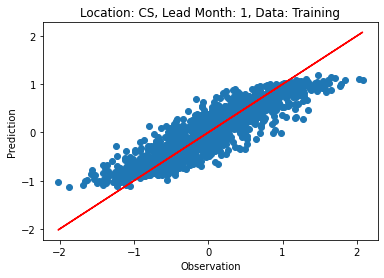

Training Model 5
Epoch [20/400], Avg Loss: 4.5665,  Val MSE: 0.2071
Epoch [40/400], Avg Loss: 0.8421,  Val MSE: 0.1942
Epoch [60/400], Avg Loss: 0.4290,  Val MSE: 0.1642
Epoch [80/400], Avg Loss: 0.3460,  Val MSE: 0.1491
Epoch [100/400], Avg Loss: 0.3093,  Val MSE: 0.1367
Epoch [120/400], Avg Loss: 0.2871,  Val MSE: 0.1286
Epoch [140/400], Avg Loss: 0.2725,  Val MSE: 0.1252
Epoch [160/400], Avg Loss: 0.2605,  Val MSE: 0.1242
Epoch [180/400], Avg Loss: 0.2511,  Val MSE: 0.1237
Epoch [200/400], Avg Loss: 0.2431,  Val MSE: 0.1232
Epoch [220/400], Avg Loss: 0.2364,  Val MSE: 0.1231
Epoch [240/400], Avg Loss: 0.2305,  Val MSE: 0.1230
Epoch [260/400], Avg Loss: 0.2249,  Val MSE: 0.1227
Epoch [280/400], Avg Loss: 0.2194,  Val MSE: 0.1224
Epoch [300/400], Avg Loss: 0.2154,  Val MSE: 0.1222
Epoch [320/400], Avg Loss: 0.2127,  Val MSE: 0.1221
Epoch [340/400], Avg Loss: 0.2111,  Val MSE: 0.1221
Epoch [360/400], Avg Loss: 0.2097,  Val MSE: 0.1221
Epoch [380/400], Avg Loss: 0.2086,  Val MSE: 0.1222

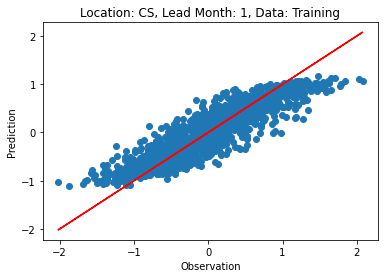

Location: CS
Persistence MSE: 0.1247
Test MSE: 0.1227
Persist CSI: 0.4043
Persist CSI 80: 0.5327
Test CSI: 0.3143
Test CSI 80: 0.4737


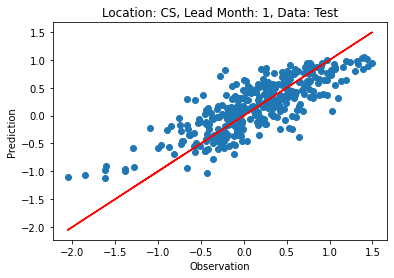

Location: SI
90th Threshold: 1.0238477
80th Threshold: 0.6232777
Training Model 1
Epoch [20/400], Avg Loss: 4.7756,  Val MSE: 0.3132
Epoch [40/400], Avg Loss: 0.9060,  Val MSE: 0.2615
Epoch [60/400], Avg Loss: 0.5192,  Val MSE: 0.2335
Epoch [80/400], Avg Loss: 0.4425,  Val MSE: 0.2252
Epoch [100/400], Avg Loss: 0.4052,  Val MSE: 0.2224
Epoch [120/400], Avg Loss: 0.3831,  Val MSE: 0.2215
Epoch [140/400], Avg Loss: 0.3697,  Val MSE: 0.2209
Epoch [160/400], Avg Loss: 0.3586,  Val MSE: 0.2209
Epoch [180/400], Avg Loss: 0.3487,  Val MSE: 0.2214
Epoch [200/400], Avg Loss: 0.3414,  Val MSE: 0.2220
Epoch [220/400], Avg Loss: 0.3353,  Val MSE: 0.2228
Epoch [240/400], Avg Loss: 0.3302,  Val MSE: 0.2235
Epoch [260/400], Avg Loss: 0.3260,  Val MSE: 0.2242
Epoch [280/400], Avg Loss: 0.3240,  Val MSE: 0.2249
Epoch [300/400], Avg Loss: 0.3222,  Val MSE: 0.2255
Epoch [320/400], Avg Loss: 0.3204,  Val MSE: 0.2261
Epoch [340/400], Avg Loss: 0.3183,  Val MSE: 0.2268
Epoch [360/400], Avg Loss: 0.3166,  Va

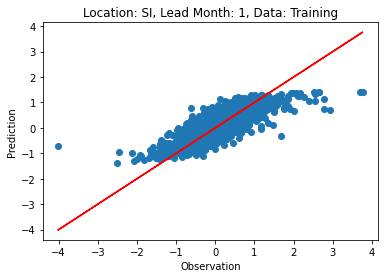

Training Model 2
Epoch [20/400], Avg Loss: 4.7724,  Val MSE: 0.3146
Epoch [40/400], Avg Loss: 0.9920,  Val MSE: 0.2753
Epoch [60/400], Avg Loss: 0.5803,  Val MSE: 0.2370
Epoch [80/400], Avg Loss: 0.4883,  Val MSE: 0.2268
Epoch [100/400], Avg Loss: 0.4434,  Val MSE: 0.2234
Epoch [120/400], Avg Loss: 0.4157,  Val MSE: 0.2219
Epoch [140/400], Avg Loss: 0.3982,  Val MSE: 0.2210
Epoch [160/400], Avg Loss: 0.3852,  Val MSE: 0.2204
Epoch [180/400], Avg Loss: 0.3741,  Val MSE: 0.2200
Epoch [200/400], Avg Loss: 0.3666,  Val MSE: 0.2198
Epoch [220/400], Avg Loss: 0.3613,  Val MSE: 0.2198
Epoch [240/400], Avg Loss: 0.3575,  Val MSE: 0.2199
Epoch [260/400], Avg Loss: 0.3549,  Val MSE: 0.2202
Epoch [280/400], Avg Loss: 0.3529,  Val MSE: 0.2206
Epoch [300/400], Avg Loss: 0.3508,  Val MSE: 0.2210
Epoch [320/400], Avg Loss: 0.3487,  Val MSE: 0.2213
Epoch [340/400], Avg Loss: 0.3465,  Val MSE: 0.2218
Epoch [360/400], Avg Loss: 0.3436,  Val MSE: 0.2222
Epoch [380/400], Avg Loss: 0.3410,  Val MSE: 0.2227

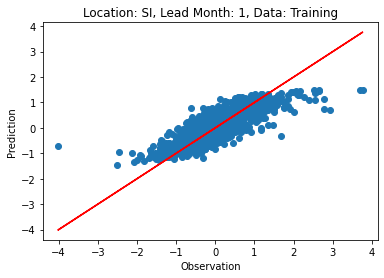

Training Model 3
Epoch [20/400], Avg Loss: 4.7533,  Val MSE: 0.3127
Epoch [40/400], Avg Loss: 0.9305,  Val MSE: 0.2648
Epoch [60/400], Avg Loss: 0.5415,  Val MSE: 0.2354
Epoch [80/400], Avg Loss: 0.4558,  Val MSE: 0.2260
Epoch [100/400], Avg Loss: 0.4156,  Val MSE: 0.2231
Epoch [120/400], Avg Loss: 0.3923,  Val MSE: 0.2218
Epoch [140/400], Avg Loss: 0.3761,  Val MSE: 0.2212
Epoch [160/400], Avg Loss: 0.3638,  Val MSE: 0.2209
Epoch [180/400], Avg Loss: 0.3549,  Val MSE: 0.2210
Epoch [200/400], Avg Loss: 0.3488,  Val MSE: 0.2211
Epoch [220/400], Avg Loss: 0.3447,  Val MSE: 0.2215
Epoch [240/400], Avg Loss: 0.3409,  Val MSE: 0.2221
Epoch [260/400], Avg Loss: 0.3371,  Val MSE: 0.2226
Epoch [280/400], Avg Loss: 0.3333,  Val MSE: 0.2232
Epoch [300/400], Avg Loss: 0.3295,  Val MSE: 0.2237
Epoch [320/400], Avg Loss: 0.3261,  Val MSE: 0.2241
Epoch [340/400], Avg Loss: 0.3233,  Val MSE: 0.2244
Epoch [360/400], Avg Loss: 0.3215,  Val MSE: 0.2247
Epoch [380/400], Avg Loss: 0.3198,  Val MSE: 0.2249

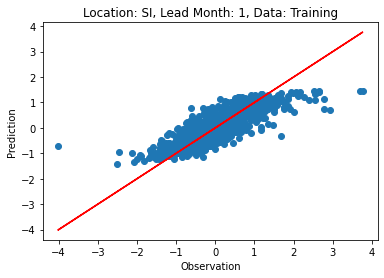

Training Model 4
Epoch [20/400], Avg Loss: 4.7511,  Val MSE: 0.3002
Epoch [40/400], Avg Loss: 0.9201,  Val MSE: 0.2666
Epoch [60/400], Avg Loss: 0.5214,  Val MSE: 0.2341
Epoch [80/400], Avg Loss: 0.4501,  Val MSE: 0.2274
Epoch [100/400], Avg Loss: 0.4125,  Val MSE: 0.2252
Epoch [120/400], Avg Loss: 0.3879,  Val MSE: 0.2244
Epoch [140/400], Avg Loss: 0.3702,  Val MSE: 0.2245
Epoch [160/400], Avg Loss: 0.3577,  Val MSE: 0.2249
Epoch [180/400], Avg Loss: 0.3483,  Val MSE: 0.2258
Epoch [200/400], Avg Loss: 0.3410,  Val MSE: 0.2266
Epoch [220/400], Avg Loss: 0.3364,  Val MSE: 0.2273
Epoch [240/400], Avg Loss: 0.3335,  Val MSE: 0.2282
Epoch [260/400], Avg Loss: 0.3303,  Val MSE: 0.2292
Epoch [280/400], Avg Loss: 0.3269,  Val MSE: 0.2300
Epoch [300/400], Avg Loss: 0.3234,  Val MSE: 0.2306
Epoch [320/400], Avg Loss: 0.3201,  Val MSE: 0.2313
Epoch [340/400], Avg Loss: 0.3172,  Val MSE: 0.2320
Epoch [360/400], Avg Loss: 0.3144,  Val MSE: 0.2325
Epoch [380/400], Avg Loss: 0.3119,  Val MSE: 0.2330

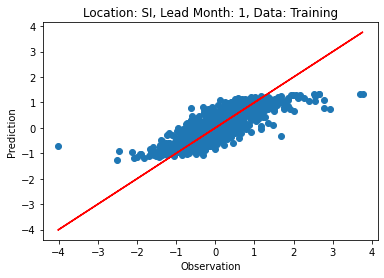

Training Model 5
Epoch [20/400], Avg Loss: 4.7866,  Val MSE: 0.3169
Epoch [40/400], Avg Loss: 0.8689,  Val MSE: 0.2590
Epoch [60/400], Avg Loss: 0.4935,  Val MSE: 0.2311
Epoch [80/400], Avg Loss: 0.4312,  Val MSE: 0.2244
Epoch [100/400], Avg Loss: 0.4020,  Val MSE: 0.2222
Epoch [120/400], Avg Loss: 0.3829,  Val MSE: 0.2209
Epoch [140/400], Avg Loss: 0.3696,  Val MSE: 0.2203
Epoch [160/400], Avg Loss: 0.3599,  Val MSE: 0.2203
Epoch [180/400], Avg Loss: 0.3537,  Val MSE: 0.2208
Epoch [200/400], Avg Loss: 0.3496,  Val MSE: 0.2214
Epoch [220/400], Avg Loss: 0.3460,  Val MSE: 0.2219
Epoch [240/400], Avg Loss: 0.3431,  Val MSE: 0.2227
Epoch [260/400], Avg Loss: 0.3404,  Val MSE: 0.2234
Epoch [280/400], Avg Loss: 0.3375,  Val MSE: 0.2242
Epoch [300/400], Avg Loss: 0.3344,  Val MSE: 0.2250
Epoch [320/400], Avg Loss: 0.3316,  Val MSE: 0.2257
Epoch [340/400], Avg Loss: 0.3291,  Val MSE: 0.2265
Epoch [360/400], Avg Loss: 0.3270,  Val MSE: 0.2272
Epoch [380/400], Avg Loss: 0.3255,  Val MSE: 0.2278

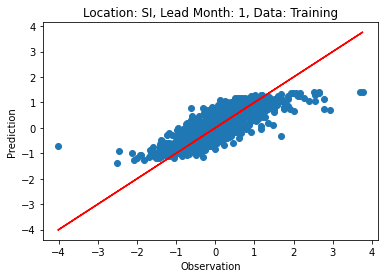

Location: SI
Persistence MSE: 0.2440
Test MSE: 0.2274
Persist CSI: 0.4545
Persist CSI 80: 0.4646
Test CSI: 0.4474
Test CSI 80: 0.4646


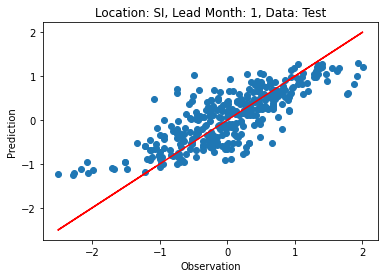

Location: CR
90th Threshold: 1.0850446
80th Threshold: 0.6930024
Training Model 1
Epoch [20/400], Avg Loss: 4.8392,  Val MSE: 0.2722
Epoch [40/400], Avg Loss: 1.0050,  Val MSE: 0.2462
Epoch [60/400], Avg Loss: 0.5817,  Val MSE: 0.2204
Epoch [80/400], Avg Loss: 0.5070,  Val MSE: 0.2187
Epoch [100/400], Avg Loss: 0.4743,  Val MSE: 0.2196
Epoch [120/400], Avg Loss: 0.4529,  Val MSE: 0.2210
Epoch [140/400], Avg Loss: 0.4369,  Val MSE: 0.2235
Epoch [160/400], Avg Loss: 0.4244,  Val MSE: 0.2257
Epoch [180/400], Avg Loss: 0.4148,  Val MSE: 0.2275
Epoch [200/400], Avg Loss: 0.4082,  Val MSE: 0.2291
Epoch [220/400], Avg Loss: 0.4029,  Val MSE: 0.2303
Epoch [240/400], Avg Loss: 0.3982,  Val MSE: 0.2314
Epoch [260/400], Avg Loss: 0.3952,  Val MSE: 0.2322
Epoch [280/400], Avg Loss: 0.3924,  Val MSE: 0.2330
Epoch [300/400], Avg Loss: 0.3895,  Val MSE: 0.2336
Epoch [320/400], Avg Loss: 0.3871,  Val MSE: 0.2341
Epoch [340/400], Avg Loss: 0.3853,  Val MSE: 0.2345
Epoch [360/400], Avg Loss: 0.3839,  Va

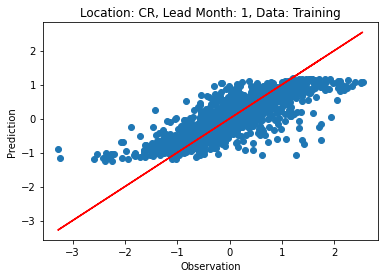

Training Model 2
Epoch [20/400], Avg Loss: 4.8481,  Val MSE: 0.2735
Epoch [40/400], Avg Loss: 1.0094,  Val MSE: 0.2489
Epoch [60/400], Avg Loss: 0.6055,  Val MSE: 0.2212
Epoch [80/400], Avg Loss: 0.5295,  Val MSE: 0.2177
Epoch [100/400], Avg Loss: 0.4899,  Val MSE: 0.2178
Epoch [120/400], Avg Loss: 0.4663,  Val MSE: 0.2188
Epoch [140/400], Avg Loss: 0.4490,  Val MSE: 0.2206
Epoch [160/400], Avg Loss: 0.4350,  Val MSE: 0.2222
Epoch [180/400], Avg Loss: 0.4229,  Val MSE: 0.2237
Epoch [200/400], Avg Loss: 0.4121,  Val MSE: 0.2254
Epoch [220/400], Avg Loss: 0.4028,  Val MSE: 0.2270
Epoch [240/400], Avg Loss: 0.3964,  Val MSE: 0.2284
Epoch [260/400], Avg Loss: 0.3923,  Val MSE: 0.2294
Epoch [280/400], Avg Loss: 0.3893,  Val MSE: 0.2304
Epoch [300/400], Avg Loss: 0.3871,  Val MSE: 0.2313
Epoch [320/400], Avg Loss: 0.3861,  Val MSE: 0.2320
Epoch [340/400], Avg Loss: 0.3852,  Val MSE: 0.2325
Epoch [360/400], Avg Loss: 0.3840,  Val MSE: 0.2330
Epoch [380/400], Avg Loss: 0.3827,  Val MSE: 0.2336

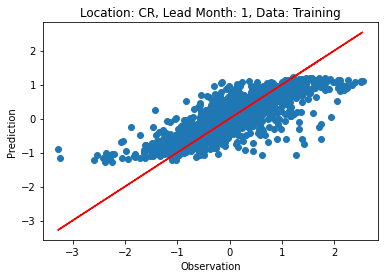

Training Model 3
Epoch [20/400], Avg Loss: 4.8592,  Val MSE: 0.2746
Epoch [40/400], Avg Loss: 0.9794,  Val MSE: 0.2439
Epoch [60/400], Avg Loss: 0.5775,  Val MSE: 0.2195
Epoch [80/400], Avg Loss: 0.5069,  Val MSE: 0.2183
Epoch [100/400], Avg Loss: 0.4678,  Val MSE: 0.2193
Epoch [120/400], Avg Loss: 0.4427,  Val MSE: 0.2209
Epoch [140/400], Avg Loss: 0.4262,  Val MSE: 0.2238
Epoch [160/400], Avg Loss: 0.4164,  Val MSE: 0.2259
Epoch [180/400], Avg Loss: 0.4089,  Val MSE: 0.2276
Epoch [200/400], Avg Loss: 0.4021,  Val MSE: 0.2289
Epoch [220/400], Avg Loss: 0.3963,  Val MSE: 0.2301
Epoch [240/400], Avg Loss: 0.3918,  Val MSE: 0.2309
Epoch [260/400], Avg Loss: 0.3890,  Val MSE: 0.2315
Epoch [280/400], Avg Loss: 0.3868,  Val MSE: 0.2320
Epoch [300/400], Avg Loss: 0.3849,  Val MSE: 0.2326
Epoch [320/400], Avg Loss: 0.3831,  Val MSE: 0.2329
Epoch [340/400], Avg Loss: 0.3812,  Val MSE: 0.2334
Epoch [360/400], Avg Loss: 0.3798,  Val MSE: 0.2338
Epoch [380/400], Avg Loss: 0.3783,  Val MSE: 0.2341

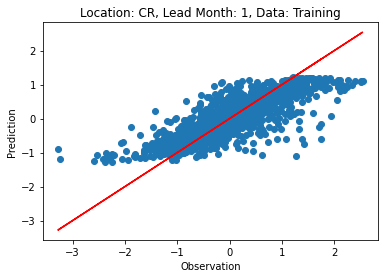

Training Model 4
Epoch [20/400], Avg Loss: 4.8140,  Val MSE: 0.2639
Epoch [40/400], Avg Loss: 1.0329,  Val MSE: 0.2464
Epoch [60/400], Avg Loss: 0.6264,  Val MSE: 0.2195
Epoch [80/400], Avg Loss: 0.5478,  Val MSE: 0.2169
Epoch [100/400], Avg Loss: 0.5058,  Val MSE: 0.2167
Epoch [120/400], Avg Loss: 0.4796,  Val MSE: 0.2174
Epoch [140/400], Avg Loss: 0.4608,  Val MSE: 0.2182
Epoch [160/400], Avg Loss: 0.4474,  Val MSE: 0.2190
Epoch [180/400], Avg Loss: 0.4370,  Val MSE: 0.2195
Epoch [200/400], Avg Loss: 0.4288,  Val MSE: 0.2200
Epoch [220/400], Avg Loss: 0.4230,  Val MSE: 0.2203
Epoch [240/400], Avg Loss: 0.4192,  Val MSE: 0.2208
Epoch [260/400], Avg Loss: 0.4161,  Val MSE: 0.2210
Epoch [280/400], Avg Loss: 0.4137,  Val MSE: 0.2214
Epoch [300/400], Avg Loss: 0.4109,  Val MSE: 0.2219
Epoch [320/400], Avg Loss: 0.4079,  Val MSE: 0.2224
Epoch [340/400], Avg Loss: 0.4046,  Val MSE: 0.2230
Epoch [360/400], Avg Loss: 0.4025,  Val MSE: 0.2235
Epoch [380/400], Avg Loss: 0.4005,  Val MSE: 0.2242

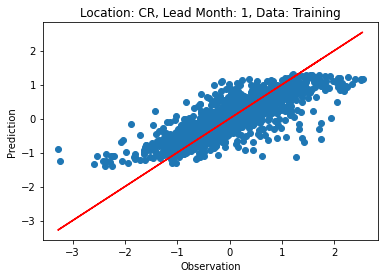

Training Model 5
Epoch [20/400], Avg Loss: 4.8275,  Val MSE: 0.2700
Epoch [40/400], Avg Loss: 1.0399,  Val MSE: 0.2484
Epoch [60/400], Avg Loss: 0.6461,  Val MSE: 0.2205
Epoch [80/400], Avg Loss: 0.5581,  Val MSE: 0.2178
Epoch [100/400], Avg Loss: 0.5057,  Val MSE: 0.2176
Epoch [120/400], Avg Loss: 0.4739,  Val MSE: 0.2187
Epoch [140/400], Avg Loss: 0.4543,  Val MSE: 0.2204
Epoch [160/400], Avg Loss: 0.4389,  Val MSE: 0.2223
Epoch [180/400], Avg Loss: 0.4275,  Val MSE: 0.2238
Epoch [200/400], Avg Loss: 0.4196,  Val MSE: 0.2250
Epoch [220/400], Avg Loss: 0.4127,  Val MSE: 0.2261
Epoch [240/400], Avg Loss: 0.4068,  Val MSE: 0.2271
Epoch [260/400], Avg Loss: 0.4023,  Val MSE: 0.2280
Epoch [280/400], Avg Loss: 0.3984,  Val MSE: 0.2292
Epoch [300/400], Avg Loss: 0.3948,  Val MSE: 0.2302
Epoch [320/400], Avg Loss: 0.3913,  Val MSE: 0.2309
Epoch [340/400], Avg Loss: 0.3875,  Val MSE: 0.2315
Epoch [360/400], Avg Loss: 0.3837,  Val MSE: 0.2321
Epoch [380/400], Avg Loss: 0.3819,  Val MSE: 0.2325

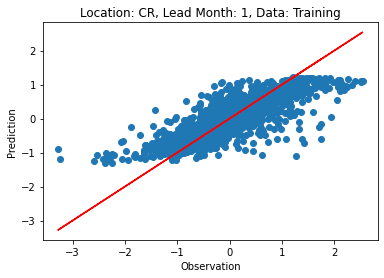

Location: CR
Persistence MSE: 0.2468
Test MSE: 0.2321
Persist CSI: 0.3286
Persist CSI 80: 0.4959
Test CSI: 0.1373
Test CSI 80: 0.4298


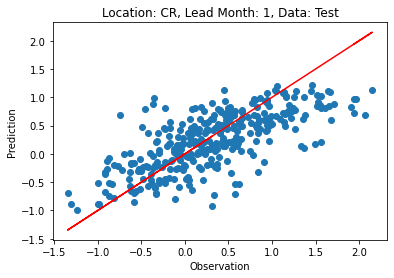

Location: OP
90th Threshold: 0.9955503
80th Threshold: 0.6495769
Training Model 1
Epoch [20/400], Avg Loss: 4.7478,  Val MSE: 0.3523
Epoch [40/400], Avg Loss: 0.9289,  Val MSE: 0.3250
Epoch [60/400], Avg Loss: 0.5324,  Val MSE: 0.2977
Epoch [80/400], Avg Loss: 0.4502,  Val MSE: 0.2899
Epoch [100/400], Avg Loss: 0.4170,  Val MSE: 0.2853
Epoch [120/400], Avg Loss: 0.3993,  Val MSE: 0.2818
Epoch [140/400], Avg Loss: 0.3883,  Val MSE: 0.2797
Epoch [160/400], Avg Loss: 0.3779,  Val MSE: 0.2784
Epoch [180/400], Avg Loss: 0.3693,  Val MSE: 0.2779
Epoch [200/400], Avg Loss: 0.3608,  Val MSE: 0.2774
Epoch [220/400], Avg Loss: 0.3534,  Val MSE: 0.2770
Epoch [240/400], Avg Loss: 0.3466,  Val MSE: 0.2769
Epoch [260/400], Avg Loss: 0.3418,  Val MSE: 0.2771
Epoch [280/400], Avg Loss: 0.3373,  Val MSE: 0.2769
Epoch [300/400], Avg Loss: 0.3335,  Val MSE: 0.2770
Epoch [320/400], Avg Loss: 0.3302,  Val MSE: 0.2770
Epoch [340/400], Avg Loss: 0.3275,  Val MSE: 0.2771
Epoch [360/400], Avg Loss: 0.3250,  Va

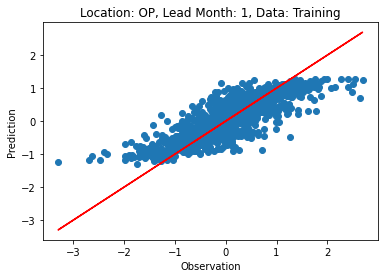

Training Model 2
Epoch [20/400], Avg Loss: 4.7453,  Val MSE: 0.3584
Epoch [40/400], Avg Loss: 0.9732,  Val MSE: 0.3324
Epoch [60/400], Avg Loss: 0.5587,  Val MSE: 0.2975
Epoch [80/400], Avg Loss: 0.4753,  Val MSE: 0.2885
Epoch [100/400], Avg Loss: 0.4365,  Val MSE: 0.2854
Epoch [120/400], Avg Loss: 0.4121,  Val MSE: 0.2831
Epoch [140/400], Avg Loss: 0.3955,  Val MSE: 0.2807
Epoch [160/400], Avg Loss: 0.3828,  Val MSE: 0.2792
Epoch [180/400], Avg Loss: 0.3736,  Val MSE: 0.2782
Epoch [200/400], Avg Loss: 0.3656,  Val MSE: 0.2777
Epoch [220/400], Avg Loss: 0.3591,  Val MSE: 0.2773
Epoch [240/400], Avg Loss: 0.3528,  Val MSE: 0.2771
Epoch [260/400], Avg Loss: 0.3471,  Val MSE: 0.2772
Epoch [280/400], Avg Loss: 0.3421,  Val MSE: 0.2773
Epoch [300/400], Avg Loss: 0.3375,  Val MSE: 0.2777
Epoch [320/400], Avg Loss: 0.3334,  Val MSE: 0.2778
Epoch [340/400], Avg Loss: 0.3304,  Val MSE: 0.2779
Epoch [360/400], Avg Loss: 0.3278,  Val MSE: 0.2780
Epoch [380/400], Avg Loss: 0.3249,  Val MSE: 0.2782

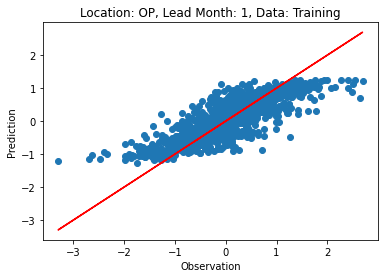

Training Model 3
Epoch [20/400], Avg Loss: 4.8022,  Val MSE: 0.3661
Epoch [40/400], Avg Loss: 0.9274,  Val MSE: 0.3264
Epoch [60/400], Avg Loss: 0.5261,  Val MSE: 0.2956
Epoch [80/400], Avg Loss: 0.4581,  Val MSE: 0.2895
Epoch [100/400], Avg Loss: 0.4182,  Val MSE: 0.2857
Epoch [120/400], Avg Loss: 0.3930,  Val MSE: 0.2823
Epoch [140/400], Avg Loss: 0.3763,  Val MSE: 0.2795
Epoch [160/400], Avg Loss: 0.3650,  Val MSE: 0.2781
Epoch [180/400], Avg Loss: 0.3547,  Val MSE: 0.2772
Epoch [200/400], Avg Loss: 0.3450,  Val MSE: 0.2767
Epoch [220/400], Avg Loss: 0.3379,  Val MSE: 0.2765
Epoch [240/400], Avg Loss: 0.3329,  Val MSE: 0.2767
Epoch [260/400], Avg Loss: 0.3285,  Val MSE: 0.2769
Epoch [280/400], Avg Loss: 0.3243,  Val MSE: 0.2769
Epoch [300/400], Avg Loss: 0.3201,  Val MSE: 0.2770
Epoch [320/400], Avg Loss: 0.3164,  Val MSE: 0.2770
Epoch [340/400], Avg Loss: 0.3136,  Val MSE: 0.2770
Epoch [360/400], Avg Loss: 0.3112,  Val MSE: 0.2770
Epoch [380/400], Avg Loss: 0.3098,  Val MSE: 0.2768

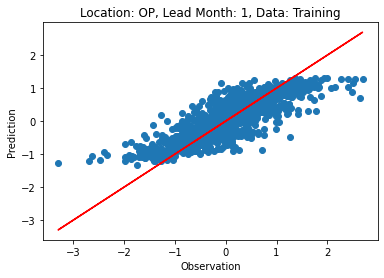

Training Model 4
Epoch [20/400], Avg Loss: 4.7144,  Val MSE: 0.3679
Epoch [40/400], Avg Loss: 0.8928,  Val MSE: 0.3262
Epoch [60/400], Avg Loss: 0.4995,  Val MSE: 0.2969
Epoch [80/400], Avg Loss: 0.4327,  Val MSE: 0.2880
Epoch [100/400], Avg Loss: 0.4055,  Val MSE: 0.2837
Epoch [120/400], Avg Loss: 0.3928,  Val MSE: 0.2808
Epoch [140/400], Avg Loss: 0.3848,  Val MSE: 0.2792
Epoch [160/400], Avg Loss: 0.3774,  Val MSE: 0.2779
Epoch [180/400], Avg Loss: 0.3709,  Val MSE: 0.2773
Epoch [200/400], Avg Loss: 0.3644,  Val MSE: 0.2768
Epoch [220/400], Avg Loss: 0.3582,  Val MSE: 0.2766
Epoch [240/400], Avg Loss: 0.3529,  Val MSE: 0.2764
Epoch [260/400], Avg Loss: 0.3483,  Val MSE: 0.2767
Epoch [280/400], Avg Loss: 0.3446,  Val MSE: 0.2769
Epoch [300/400], Avg Loss: 0.3419,  Val MSE: 0.2770
Epoch [320/400], Avg Loss: 0.3391,  Val MSE: 0.2772
Epoch [340/400], Avg Loss: 0.3359,  Val MSE: 0.2776
Epoch [360/400], Avg Loss: 0.3326,  Val MSE: 0.2777
Epoch [380/400], Avg Loss: 0.3293,  Val MSE: 0.2780

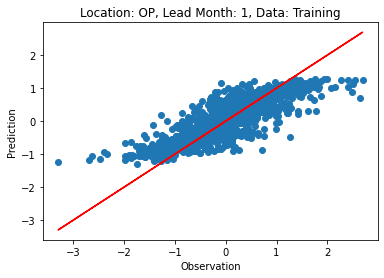

Training Model 5
Epoch [20/400], Avg Loss: 4.7576,  Val MSE: 0.3541
Epoch [40/400], Avg Loss: 0.9360,  Val MSE: 0.3290
Epoch [60/400], Avg Loss: 0.5222,  Val MSE: 0.2988
Epoch [80/400], Avg Loss: 0.4406,  Val MSE: 0.2902
Epoch [100/400], Avg Loss: 0.3984,  Val MSE: 0.2849
Epoch [120/400], Avg Loss: 0.3744,  Val MSE: 0.2810
Epoch [140/400], Avg Loss: 0.3631,  Val MSE: 0.2786
Epoch [160/400], Avg Loss: 0.3562,  Val MSE: 0.2773
Epoch [180/400], Avg Loss: 0.3502,  Val MSE: 0.2765
Epoch [200/400], Avg Loss: 0.3451,  Val MSE: 0.2761
Epoch [220/400], Avg Loss: 0.3404,  Val MSE: 0.2763
Epoch [240/400], Avg Loss: 0.3368,  Val MSE: 0.2764
Epoch [260/400], Avg Loss: 0.3338,  Val MSE: 0.2765
Epoch [280/400], Avg Loss: 0.3310,  Val MSE: 0.2765
Epoch [300/400], Avg Loss: 0.3288,  Val MSE: 0.2765
Epoch [320/400], Avg Loss: 0.3272,  Val MSE: 0.2766
Epoch [340/400], Avg Loss: 0.3257,  Val MSE: 0.2765
Epoch [360/400], Avg Loss: 0.3246,  Val MSE: 0.2766
Epoch [380/400], Avg Loss: 0.3236,  Val MSE: 0.2767

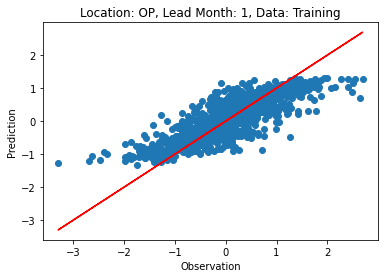

Location: OP
Persistence MSE: 0.3155
Test MSE: 0.2774
Persist CSI: 0.3478
Persist CSI 80: 0.4198
Test CSI: 0.4103
Test CSI 80: 0.4430


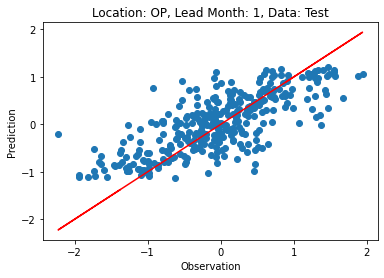

Location: T
90th Threshold: 1.2497799
80th Threshold: 0.8168559
Training Model 1
Epoch [20/400], Avg Loss: 4.7941,  Val MSE: 0.4988
Epoch [40/400], Avg Loss: 0.9695,  Val MSE: 0.4313
Epoch [60/400], Avg Loss: 0.5660,  Val MSE: 0.3902
Epoch [80/400], Avg Loss: 0.4959,  Val MSE: 0.3794
Epoch [100/400], Avg Loss: 0.4718,  Val MSE: 0.3764
Epoch [120/400], Avg Loss: 0.4562,  Val MSE: 0.3762
Epoch [140/400], Avg Loss: 0.4442,  Val MSE: 0.3774
Epoch [160/400], Avg Loss: 0.4342,  Val MSE: 0.3796
Epoch [180/400], Avg Loss: 0.4262,  Val MSE: 0.3817
Epoch [200/400], Avg Loss: 0.4199,  Val MSE: 0.3834
Epoch [220/400], Avg Loss: 0.4147,  Val MSE: 0.3847
Epoch [240/400], Avg Loss: 0.4098,  Val MSE: 0.3861
Epoch [260/400], Avg Loss: 0.4052,  Val MSE: 0.3871
Epoch [280/400], Avg Loss: 0.4004,  Val MSE: 0.3883
Epoch [300/400], Avg Loss: 0.3958,  Val MSE: 0.3890
Epoch [320/400], Avg Loss: 0.3925,  Val MSE: 0.3897
Epoch [340/400], Avg Loss: 0.3902,  Val MSE: 0.3906
Epoch [360/400], Avg Loss: 0.3887,  Val

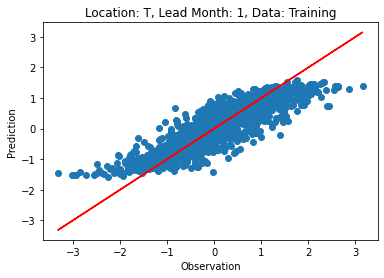

Training Model 2
Epoch [20/400], Avg Loss: 4.8605,  Val MSE: 0.4897
Epoch [40/400], Avg Loss: 0.9865,  Val MSE: 0.4275
Epoch [60/400], Avg Loss: 0.5871,  Val MSE: 0.3897
Epoch [80/400], Avg Loss: 0.5183,  Val MSE: 0.3796
Epoch [100/400], Avg Loss: 0.4891,  Val MSE: 0.3769
Epoch [120/400], Avg Loss: 0.4701,  Val MSE: 0.3768
Epoch [140/400], Avg Loss: 0.4559,  Val MSE: 0.3777
Epoch [160/400], Avg Loss: 0.4452,  Val MSE: 0.3801
Epoch [180/400], Avg Loss: 0.4365,  Val MSE: 0.3823
Epoch [200/400], Avg Loss: 0.4287,  Val MSE: 0.3840
Epoch [220/400], Avg Loss: 0.4220,  Val MSE: 0.3856
Epoch [240/400], Avg Loss: 0.4160,  Val MSE: 0.3872
Epoch [260/400], Avg Loss: 0.4109,  Val MSE: 0.3882
Epoch [280/400], Avg Loss: 0.4061,  Val MSE: 0.3896
Epoch [300/400], Avg Loss: 0.4021,  Val MSE: 0.3906
Epoch [320/400], Avg Loss: 0.3986,  Val MSE: 0.3920
Epoch [340/400], Avg Loss: 0.3957,  Val MSE: 0.3929
Epoch [360/400], Avg Loss: 0.3929,  Val MSE: 0.3942
Epoch [380/400], Avg Loss: 0.3907,  Val MSE: 0.3951

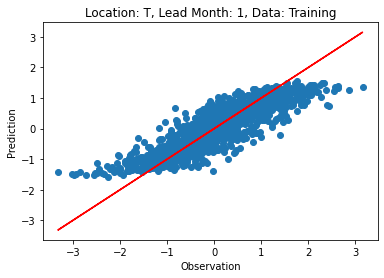

Training Model 3
Epoch [20/400], Avg Loss: 4.8549,  Val MSE: 0.4775
Epoch [40/400], Avg Loss: 1.0629,  Val MSE: 0.4282
Epoch [60/400], Avg Loss: 0.6394,  Val MSE: 0.3939
Epoch [80/400], Avg Loss: 0.5467,  Val MSE: 0.3837
Epoch [100/400], Avg Loss: 0.5011,  Val MSE: 0.3806
Epoch [120/400], Avg Loss: 0.4762,  Val MSE: 0.3798
Epoch [140/400], Avg Loss: 0.4594,  Val MSE: 0.3802
Epoch [160/400], Avg Loss: 0.4470,  Val MSE: 0.3817
Epoch [180/400], Avg Loss: 0.4367,  Val MSE: 0.3842
Epoch [200/400], Avg Loss: 0.4278,  Val MSE: 0.3867
Epoch [220/400], Avg Loss: 0.4195,  Val MSE: 0.3888
Epoch [240/400], Avg Loss: 0.4122,  Val MSE: 0.3903
Epoch [260/400], Avg Loss: 0.4066,  Val MSE: 0.3917
Epoch [280/400], Avg Loss: 0.4017,  Val MSE: 0.3931
Epoch [300/400], Avg Loss: 0.3975,  Val MSE: 0.3942
Epoch [320/400], Avg Loss: 0.3942,  Val MSE: 0.3952
Epoch [340/400], Avg Loss: 0.3913,  Val MSE: 0.3961
Epoch [360/400], Avg Loss: 0.3884,  Val MSE: 0.3970
Epoch [380/400], Avg Loss: 0.3859,  Val MSE: 0.3977

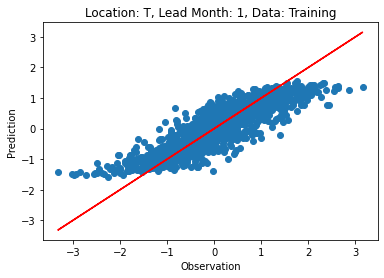

Training Model 4
Epoch [20/400], Avg Loss: 4.7932,  Val MSE: 0.4937
Epoch [40/400], Avg Loss: 1.0439,  Val MSE: 0.4281
Epoch [60/400], Avg Loss: 0.6233,  Val MSE: 0.3936
Epoch [80/400], Avg Loss: 0.5304,  Val MSE: 0.3808
Epoch [100/400], Avg Loss: 0.4900,  Val MSE: 0.3767
Epoch [120/400], Avg Loss: 0.4668,  Val MSE: 0.3764
Epoch [140/400], Avg Loss: 0.4500,  Val MSE: 0.3775
Epoch [160/400], Avg Loss: 0.4369,  Val MSE: 0.3792
Epoch [180/400], Avg Loss: 0.4265,  Val MSE: 0.3816
Epoch [200/400], Avg Loss: 0.4173,  Val MSE: 0.3837
Epoch [220/400], Avg Loss: 0.4089,  Val MSE: 0.3852
Epoch [240/400], Avg Loss: 0.4006,  Val MSE: 0.3865
Epoch [260/400], Avg Loss: 0.3945,  Val MSE: 0.3874
Epoch [280/400], Avg Loss: 0.3895,  Val MSE: 0.3881
Epoch [300/400], Avg Loss: 0.3859,  Val MSE: 0.3889
Epoch [320/400], Avg Loss: 0.3833,  Val MSE: 0.3894
Epoch [340/400], Avg Loss: 0.3817,  Val MSE: 0.3900
Epoch [360/400], Avg Loss: 0.3802,  Val MSE: 0.3905
Epoch [380/400], Avg Loss: 0.3790,  Val MSE: 0.3915

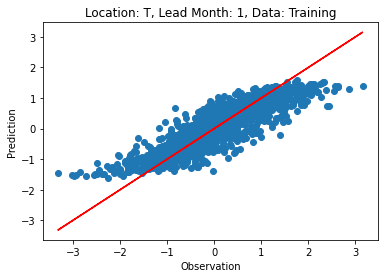

Training Model 5
Epoch [20/400], Avg Loss: 4.8555,  Val MSE: 0.4909
Epoch [40/400], Avg Loss: 1.0364,  Val MSE: 0.4296
Epoch [60/400], Avg Loss: 0.6003,  Val MSE: 0.3922
Epoch [80/400], Avg Loss: 0.5158,  Val MSE: 0.3795
Epoch [100/400], Avg Loss: 0.4817,  Val MSE: 0.3770
Epoch [120/400], Avg Loss: 0.4611,  Val MSE: 0.3773
Epoch [140/400], Avg Loss: 0.4452,  Val MSE: 0.3783
Epoch [160/400], Avg Loss: 0.4323,  Val MSE: 0.3797
Epoch [180/400], Avg Loss: 0.4236,  Val MSE: 0.3819
Epoch [200/400], Avg Loss: 0.4180,  Val MSE: 0.3838
Epoch [220/400], Avg Loss: 0.4137,  Val MSE: 0.3859
Epoch [240/400], Avg Loss: 0.4095,  Val MSE: 0.3880
Epoch [260/400], Avg Loss: 0.4055,  Val MSE: 0.3895
Epoch [280/400], Avg Loss: 0.4013,  Val MSE: 0.3911
Epoch [300/400], Avg Loss: 0.3971,  Val MSE: 0.3922
Epoch [320/400], Avg Loss: 0.3941,  Val MSE: 0.3937
Epoch [340/400], Avg Loss: 0.3924,  Val MSE: 0.3950
Epoch [360/400], Avg Loss: 0.3908,  Val MSE: 0.3963
Epoch [380/400], Avg Loss: 0.3895,  Val MSE: 0.3974

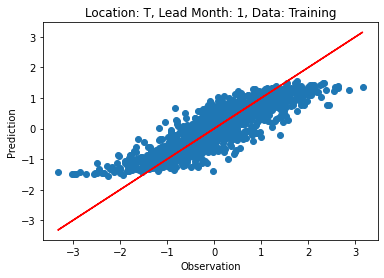

Location: T
Persistence MSE: 0.3926
Test MSE: 0.3955
Persist CSI: 0.4595
Persist CSI 80: 0.5541
Test CSI: 0.3735
Test CSI 80: 0.5782


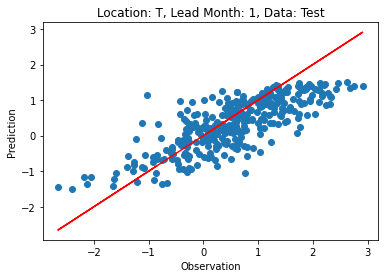

Location: BP
90th Threshold: 1.1166999
80th Threshold: 0.6538955
Training Model 1
Epoch [20/400], Avg Loss: 4.8638,  Val MSE: 0.4628
Epoch [40/400], Avg Loss: 0.9956,  Val MSE: 0.4016
Epoch [60/400], Avg Loss: 0.6281,  Val MSE: 0.3835
Epoch [80/400], Avg Loss: 0.5545,  Val MSE: 0.3822
Epoch [100/400], Avg Loss: 0.5135,  Val MSE: 0.3811
Epoch [120/400], Avg Loss: 0.4895,  Val MSE: 0.3801
Epoch [140/400], Avg Loss: 0.4757,  Val MSE: 0.3799
Epoch [160/400], Avg Loss: 0.4676,  Val MSE: 0.3800
Epoch [180/400], Avg Loss: 0.4603,  Val MSE: 0.3804
Epoch [200/400], Avg Loss: 0.4534,  Val MSE: 0.3807
Epoch [220/400], Avg Loss: 0.4474,  Val MSE: 0.3809
Epoch [240/400], Avg Loss: 0.4432,  Val MSE: 0.3811
Epoch [260/400], Avg Loss: 0.4398,  Val MSE: 0.3813
Epoch [280/400], Avg Loss: 0.4372,  Val MSE: 0.3816
Epoch [300/400], Avg Loss: 0.4345,  Val MSE: 0.3817
Epoch [320/400], Avg Loss: 0.4318,  Val MSE: 0.3819
Epoch [340/400], Avg Loss: 0.4290,  Val MSE: 0.3821
Epoch [360/400], Avg Loss: 0.4270,  Va

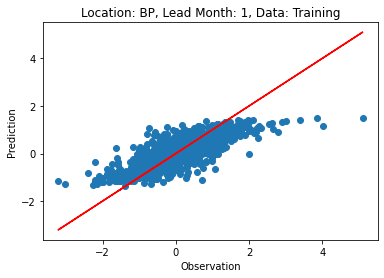

Training Model 2
Epoch [20/400], Avg Loss: 4.8709,  Val MSE: 0.4490
Epoch [40/400], Avg Loss: 1.0561,  Val MSE: 0.4019
Epoch [60/400], Avg Loss: 0.6594,  Val MSE: 0.3843
Epoch [80/400], Avg Loss: 0.5797,  Val MSE: 0.3813
Epoch [100/400], Avg Loss: 0.5432,  Val MSE: 0.3804
Epoch [120/400], Avg Loss: 0.5180,  Val MSE: 0.3799
Epoch [140/400], Avg Loss: 0.4999,  Val MSE: 0.3797
Epoch [160/400], Avg Loss: 0.4859,  Val MSE: 0.3797
Epoch [180/400], Avg Loss: 0.4748,  Val MSE: 0.3799
Epoch [200/400], Avg Loss: 0.4673,  Val MSE: 0.3802
Epoch [220/400], Avg Loss: 0.4603,  Val MSE: 0.3804
Epoch [240/400], Avg Loss: 0.4551,  Val MSE: 0.3805
Epoch [260/400], Avg Loss: 0.4507,  Val MSE: 0.3807
Epoch [280/400], Avg Loss: 0.4471,  Val MSE: 0.3809
Epoch [300/400], Avg Loss: 0.4442,  Val MSE: 0.3811
Epoch [320/400], Avg Loss: 0.4410,  Val MSE: 0.3814
Epoch [340/400], Avg Loss: 0.4381,  Val MSE: 0.3817
Epoch [360/400], Avg Loss: 0.4354,  Val MSE: 0.3820
Epoch [380/400], Avg Loss: 0.4329,  Val MSE: 0.3822

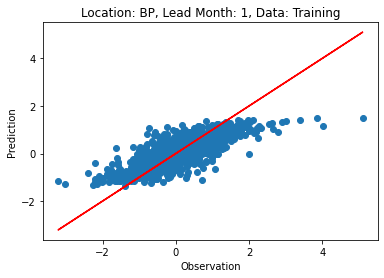

Training Model 3
Epoch [20/400], Avg Loss: 4.8366,  Val MSE: 0.4446
Epoch [40/400], Avg Loss: 1.0175,  Val MSE: 0.4014
Epoch [60/400], Avg Loss: 0.6300,  Val MSE: 0.3850
Epoch [80/400], Avg Loss: 0.5512,  Val MSE: 0.3828
Epoch [100/400], Avg Loss: 0.5126,  Val MSE: 0.3810
Epoch [120/400], Avg Loss: 0.4930,  Val MSE: 0.3801
Epoch [140/400], Avg Loss: 0.4802,  Val MSE: 0.3800
Epoch [160/400], Avg Loss: 0.4711,  Val MSE: 0.3803
Epoch [180/400], Avg Loss: 0.4642,  Val MSE: 0.3806
Epoch [200/400], Avg Loss: 0.4588,  Val MSE: 0.3809
Epoch [220/400], Avg Loss: 0.4547,  Val MSE: 0.3813
Epoch [240/400], Avg Loss: 0.4515,  Val MSE: 0.3815
Epoch [260/400], Avg Loss: 0.4485,  Val MSE: 0.3816
Epoch [280/400], Avg Loss: 0.4456,  Val MSE: 0.3817
Epoch [300/400], Avg Loss: 0.4428,  Val MSE: 0.3818
Epoch [320/400], Avg Loss: 0.4398,  Val MSE: 0.3821
Epoch [340/400], Avg Loss: 0.4368,  Val MSE: 0.3822
Epoch [360/400], Avg Loss: 0.4342,  Val MSE: 0.3824
Epoch [380/400], Avg Loss: 0.4320,  Val MSE: 0.3825

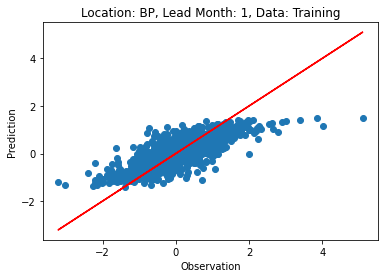

Training Model 4
Epoch [20/400], Avg Loss: 4.8829,  Val MSE: 0.4471
Epoch [40/400], Avg Loss: 0.9892,  Val MSE: 0.3958
Epoch [60/400], Avg Loss: 0.6258,  Val MSE: 0.3836
Epoch [80/400], Avg Loss: 0.5562,  Val MSE: 0.3824
Epoch [100/400], Avg Loss: 0.5218,  Val MSE: 0.3814
Epoch [120/400], Avg Loss: 0.4974,  Val MSE: 0.3811
Epoch [140/400], Avg Loss: 0.4757,  Val MSE: 0.3813
Epoch [160/400], Avg Loss: 0.4607,  Val MSE: 0.3815
Epoch [180/400], Avg Loss: 0.4517,  Val MSE: 0.3816
Epoch [200/400], Avg Loss: 0.4461,  Val MSE: 0.3818
Epoch [220/400], Avg Loss: 0.4421,  Val MSE: 0.3817
Epoch [240/400], Avg Loss: 0.4387,  Val MSE: 0.3816
Epoch [260/400], Avg Loss: 0.4362,  Val MSE: 0.3815
Epoch [280/400], Avg Loss: 0.4348,  Val MSE: 0.3814
Epoch [300/400], Avg Loss: 0.4338,  Val MSE: 0.3813
Epoch [320/400], Avg Loss: 0.4330,  Val MSE: 0.3814
Epoch [340/400], Avg Loss: 0.4319,  Val MSE: 0.3815
Epoch [360/400], Avg Loss: 0.4308,  Val MSE: 0.3815
Epoch [380/400], Avg Loss: 0.4297,  Val MSE: 0.3816

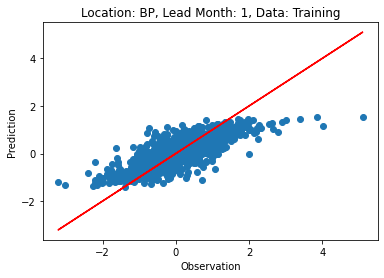

Training Model 5
Epoch [20/400], Avg Loss: 4.8778,  Val MSE: 0.4337
Epoch [40/400], Avg Loss: 1.0709,  Val MSE: 0.4008
Epoch [60/400], Avg Loss: 0.6623,  Val MSE: 0.3846
Epoch [80/400], Avg Loss: 0.5785,  Val MSE: 0.3812
Epoch [100/400], Avg Loss: 0.5398,  Val MSE: 0.3791
Epoch [120/400], Avg Loss: 0.5174,  Val MSE: 0.3780
Epoch [140/400], Avg Loss: 0.5023,  Val MSE: 0.3779
Epoch [160/400], Avg Loss: 0.4916,  Val MSE: 0.3779
Epoch [180/400], Avg Loss: 0.4833,  Val MSE: 0.3787
Epoch [200/400], Avg Loss: 0.4760,  Val MSE: 0.3795
Epoch [220/400], Avg Loss: 0.4692,  Val MSE: 0.3800
Epoch [240/400], Avg Loss: 0.4628,  Val MSE: 0.3805
Epoch [260/400], Avg Loss: 0.4564,  Val MSE: 0.3810
Epoch [280/400], Avg Loss: 0.4501,  Val MSE: 0.3815
Epoch [300/400], Avg Loss: 0.4439,  Val MSE: 0.3819
Epoch [320/400], Avg Loss: 0.4385,  Val MSE: 0.3823
Epoch [340/400], Avg Loss: 0.4338,  Val MSE: 0.3827
Epoch [360/400], Avg Loss: 0.4302,  Val MSE: 0.3829
Epoch [380/400], Avg Loss: 0.4286,  Val MSE: 0.3831

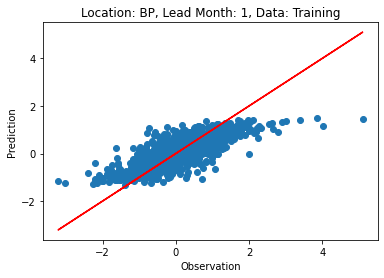

Location: BP
Persistence MSE: 0.4665
Test MSE: 0.3824
Persist CSI: 0.1875
Persist CSI 80: 0.2949
Test CSI: 0.1600
Test CSI 80: 0.2857


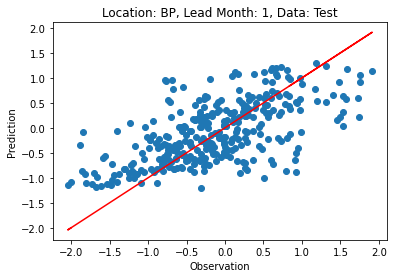

Location: BOP
90th Threshold: 1.1172504
80th Threshold: 0.72880715
Training Model 1
Epoch [20/400], Avg Loss: 4.8200,  Val MSE: 0.1929
Epoch [40/400], Avg Loss: 1.0018,  Val MSE: 0.1733
Epoch [60/400], Avg Loss: 0.5813,  Val MSE: 0.1591
Epoch [80/400], Avg Loss: 0.5088,  Val MSE: 0.1522
Epoch [100/400], Avg Loss: 0.4752,  Val MSE: 0.1498
Epoch [120/400], Avg Loss: 0.4538,  Val MSE: 0.1489
Epoch [140/400], Avg Loss: 0.4377,  Val MSE: 0.1488
Epoch [160/400], Avg Loss: 0.4239,  Val MSE: 0.1489
Epoch [180/400], Avg Loss: 0.4126,  Val MSE: 0.1492
Epoch [200/400], Avg Loss: 0.4040,  Val MSE: 0.1494
Epoch [220/400], Avg Loss: 0.3976,  Val MSE: 0.1496
Epoch [240/400], Avg Loss: 0.3931,  Val MSE: 0.1497
Epoch [260/400], Avg Loss: 0.3890,  Val MSE: 0.1499
Epoch [280/400], Avg Loss: 0.3849,  Val MSE: 0.1501
Epoch [300/400], Avg Loss: 0.3805,  Val MSE: 0.1504
Epoch [320/400], Avg Loss: 0.3758,  Val MSE: 0.1507
Epoch [340/400], Avg Loss: 0.3706,  Val MSE: 0.1510
Epoch [360/400], Avg Loss: 0.3665,  

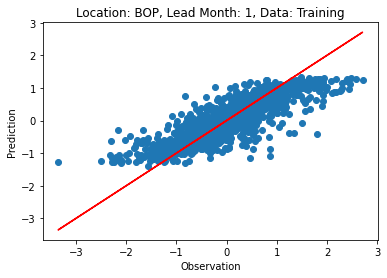

Training Model 2
Epoch [20/400], Avg Loss: 4.7739,  Val MSE: 0.1944
Epoch [40/400], Avg Loss: 1.0013,  Val MSE: 0.1732
Epoch [60/400], Avg Loss: 0.5981,  Val MSE: 0.1583
Epoch [80/400], Avg Loss: 0.5192,  Val MSE: 0.1521
Epoch [100/400], Avg Loss: 0.4825,  Val MSE: 0.1494
Epoch [120/400], Avg Loss: 0.4595,  Val MSE: 0.1484
Epoch [140/400], Avg Loss: 0.4420,  Val MSE: 0.1482
Epoch [160/400], Avg Loss: 0.4280,  Val MSE: 0.1484
Epoch [180/400], Avg Loss: 0.4164,  Val MSE: 0.1487
Epoch [200/400], Avg Loss: 0.4066,  Val MSE: 0.1490
Epoch [220/400], Avg Loss: 0.3999,  Val MSE: 0.1492
Epoch [240/400], Avg Loss: 0.3953,  Val MSE: 0.1494
Epoch [260/400], Avg Loss: 0.3913,  Val MSE: 0.1496
Epoch [280/400], Avg Loss: 0.3877,  Val MSE: 0.1498
Epoch [300/400], Avg Loss: 0.3835,  Val MSE: 0.1500
Epoch [320/400], Avg Loss: 0.3790,  Val MSE: 0.1502
Epoch [340/400], Avg Loss: 0.3745,  Val MSE: 0.1504
Epoch [360/400], Avg Loss: 0.3701,  Val MSE: 0.1506
Epoch [380/400], Avg Loss: 0.3670,  Val MSE: 0.1509

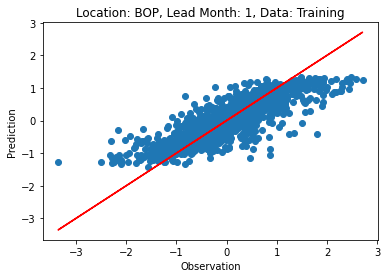

Training Model 3
Epoch [20/400], Avg Loss: 4.7179,  Val MSE: 0.1951
Epoch [40/400], Avg Loss: 0.9634,  Val MSE: 0.1723
Epoch [60/400], Avg Loss: 0.5883,  Val MSE: 0.1587
Epoch [80/400], Avg Loss: 0.5059,  Val MSE: 0.1524
Epoch [100/400], Avg Loss: 0.4619,  Val MSE: 0.1501
Epoch [120/400], Avg Loss: 0.4358,  Val MSE: 0.1490
Epoch [140/400], Avg Loss: 0.4193,  Val MSE: 0.1488
Epoch [160/400], Avg Loss: 0.4094,  Val MSE: 0.1490
Epoch [180/400], Avg Loss: 0.4017,  Val MSE: 0.1496
Epoch [200/400], Avg Loss: 0.3956,  Val MSE: 0.1501
Epoch [220/400], Avg Loss: 0.3897,  Val MSE: 0.1506
Epoch [240/400], Avg Loss: 0.3849,  Val MSE: 0.1512
Epoch [260/400], Avg Loss: 0.3802,  Val MSE: 0.1517
Epoch [280/400], Avg Loss: 0.3769,  Val MSE: 0.1522
Epoch [300/400], Avg Loss: 0.3752,  Val MSE: 0.1525
Epoch [320/400], Avg Loss: 0.3742,  Val MSE: 0.1529
Epoch [340/400], Avg Loss: 0.3733,  Val MSE: 0.1532
Epoch [360/400], Avg Loss: 0.3722,  Val MSE: 0.1535
Epoch [380/400], Avg Loss: 0.3710,  Val MSE: 0.1538

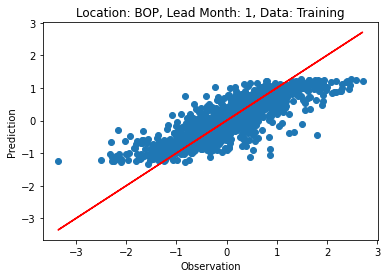

Training Model 4
Epoch [20/400], Avg Loss: 4.7876,  Val MSE: 0.1952
Epoch [40/400], Avg Loss: 0.9909,  Val MSE: 0.1733
Epoch [60/400], Avg Loss: 0.5776,  Val MSE: 0.1596
Epoch [80/400], Avg Loss: 0.5045,  Val MSE: 0.1520
Epoch [100/400], Avg Loss: 0.4736,  Val MSE: 0.1494
Epoch [120/400], Avg Loss: 0.4535,  Val MSE: 0.1487
Epoch [140/400], Avg Loss: 0.4369,  Val MSE: 0.1487
Epoch [160/400], Avg Loss: 0.4228,  Val MSE: 0.1488
Epoch [180/400], Avg Loss: 0.4107,  Val MSE: 0.1491
Epoch [200/400], Avg Loss: 0.4004,  Val MSE: 0.1495
Epoch [220/400], Avg Loss: 0.3917,  Val MSE: 0.1497
Epoch [240/400], Avg Loss: 0.3848,  Val MSE: 0.1500
Epoch [260/400], Avg Loss: 0.3795,  Val MSE: 0.1504
Epoch [280/400], Avg Loss: 0.3751,  Val MSE: 0.1508
Epoch [300/400], Avg Loss: 0.3712,  Val MSE: 0.1512
Epoch [320/400], Avg Loss: 0.3677,  Val MSE: 0.1516
Epoch [340/400], Avg Loss: 0.3649,  Val MSE: 0.1520
Epoch [360/400], Avg Loss: 0.3619,  Val MSE: 0.1522
Epoch [380/400], Avg Loss: 0.3592,  Val MSE: 0.1524

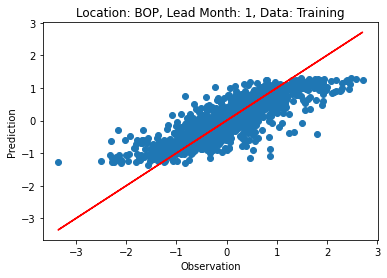

Training Model 5
Epoch [20/400], Avg Loss: 4.8400,  Val MSE: 0.1974
Epoch [40/400], Avg Loss: 1.0193,  Val MSE: 0.1727
Epoch [60/400], Avg Loss: 0.5919,  Val MSE: 0.1590
Epoch [80/400], Avg Loss: 0.5132,  Val MSE: 0.1526
Epoch [100/400], Avg Loss: 0.4783,  Val MSE: 0.1501
Epoch [120/400], Avg Loss: 0.4549,  Val MSE: 0.1490
Epoch [140/400], Avg Loss: 0.4379,  Val MSE: 0.1486
Epoch [160/400], Avg Loss: 0.4250,  Val MSE: 0.1485
Epoch [180/400], Avg Loss: 0.4157,  Val MSE: 0.1485
Epoch [200/400], Avg Loss: 0.4092,  Val MSE: 0.1489
Epoch [220/400], Avg Loss: 0.4042,  Val MSE: 0.1492
Epoch [240/400], Avg Loss: 0.4008,  Val MSE: 0.1492
Epoch [260/400], Avg Loss: 0.3979,  Val MSE: 0.1494
Epoch [280/400], Avg Loss: 0.3957,  Val MSE: 0.1497
Epoch [300/400], Avg Loss: 0.3940,  Val MSE: 0.1501
Epoch [320/400], Avg Loss: 0.3920,  Val MSE: 0.1505
Epoch [340/400], Avg Loss: 0.3897,  Val MSE: 0.1509
Epoch [360/400], Avg Loss: 0.3872,  Val MSE: 0.1513
Epoch [380/400], Avg Loss: 0.3845,  Val MSE: 0.1517

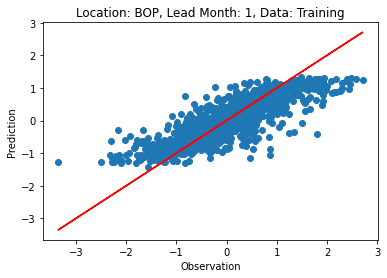

Location: BOP
Persistence MSE: 0.1690
Test MSE: 0.1523
Persist CSI: 0.3846
Persist CSI 80: 0.4717
Test CSI: 0.0714
Test CSI 80: 0.4211


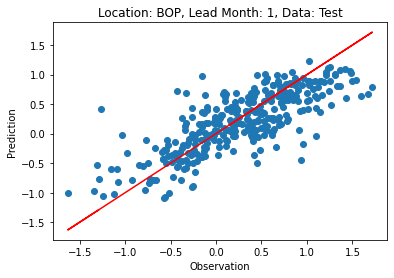

Location: W
90th Threshold: 1.331288
80th Threshold: 0.8579866
Training Model 1
Epoch [20/400], Avg Loss: 4.8783,  Val MSE: 0.5878
Epoch [40/400], Avg Loss: 1.1407,  Val MSE: 0.5119
Epoch [60/400], Avg Loss: 0.7360,  Val MSE: 0.4738
Epoch [80/400], Avg Loss: 0.6493,  Val MSE: 0.4679
Epoch [100/400], Avg Loss: 0.6040,  Val MSE: 0.4718
Epoch [120/400], Avg Loss: 0.5717,  Val MSE: 0.4771
Epoch [140/400], Avg Loss: 0.5497,  Val MSE: 0.4817
Epoch [160/400], Avg Loss: 0.5330,  Val MSE: 0.4864
Epoch [180/400], Avg Loss: 0.5212,  Val MSE: 0.4914
Epoch [200/400], Avg Loss: 0.5111,  Val MSE: 0.4949
Epoch [220/400], Avg Loss: 0.5027,  Val MSE: 0.4983
Epoch [240/400], Avg Loss: 0.4968,  Val MSE: 0.5015
Epoch [260/400], Avg Loss: 0.4933,  Val MSE: 0.5035
Epoch [280/400], Avg Loss: 0.4908,  Val MSE: 0.5042
Epoch [300/400], Avg Loss: 0.4892,  Val MSE: 0.5047
Epoch [320/400], Avg Loss: 0.4880,  Val MSE: 0.5055
Epoch [340/400], Avg Loss: 0.4869,  Val MSE: 0.5064
Epoch [360/400], Avg Loss: 0.4855,  Val 

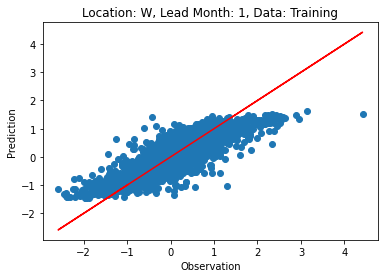

Training Model 2
Epoch [20/400], Avg Loss: 4.9197,  Val MSE: 0.5824
Epoch [40/400], Avg Loss: 1.1316,  Val MSE: 0.5123
Epoch [60/400], Avg Loss: 0.7295,  Val MSE: 0.4714
Epoch [80/400], Avg Loss: 0.6509,  Val MSE: 0.4652
Epoch [100/400], Avg Loss: 0.6099,  Val MSE: 0.4703
Epoch [120/400], Avg Loss: 0.5806,  Val MSE: 0.4751
Epoch [140/400], Avg Loss: 0.5601,  Val MSE: 0.4801
Epoch [160/400], Avg Loss: 0.5441,  Val MSE: 0.4841
Epoch [180/400], Avg Loss: 0.5308,  Val MSE: 0.4880
Epoch [200/400], Avg Loss: 0.5187,  Val MSE: 0.4915
Epoch [220/400], Avg Loss: 0.5084,  Val MSE: 0.4954
Epoch [240/400], Avg Loss: 0.5004,  Val MSE: 0.4978
Epoch [260/400], Avg Loss: 0.4937,  Val MSE: 0.5000
Epoch [280/400], Avg Loss: 0.4873,  Val MSE: 0.5015
Epoch [300/400], Avg Loss: 0.4824,  Val MSE: 0.5028
Epoch [320/400], Avg Loss: 0.4789,  Val MSE: 0.5043
Epoch [340/400], Avg Loss: 0.4766,  Val MSE: 0.5054
Epoch [360/400], Avg Loss: 0.4740,  Val MSE: 0.5063
Epoch [380/400], Avg Loss: 0.4717,  Val MSE: 0.5070

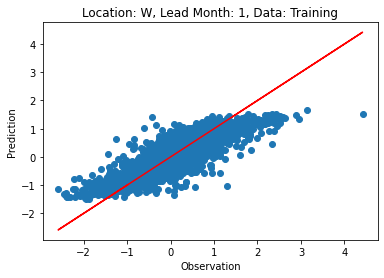

Training Model 3
Epoch [20/400], Avg Loss: 4.9157,  Val MSE: 0.5837
Epoch [40/400], Avg Loss: 1.1731,  Val MSE: 0.5255
Epoch [60/400], Avg Loss: 0.7611,  Val MSE: 0.4849
Epoch [80/400], Avg Loss: 0.6588,  Val MSE: 0.4728
Epoch [100/400], Avg Loss: 0.6075,  Val MSE: 0.4767
Epoch [120/400], Avg Loss: 0.5740,  Val MSE: 0.4845
Epoch [140/400], Avg Loss: 0.5498,  Val MSE: 0.4906
Epoch [160/400], Avg Loss: 0.5313,  Val MSE: 0.4944
Epoch [180/400], Avg Loss: 0.5178,  Val MSE: 0.4990
Epoch [200/400], Avg Loss: 0.5062,  Val MSE: 0.5034
Epoch [220/400], Avg Loss: 0.4976,  Val MSE: 0.5067
Epoch [240/400], Avg Loss: 0.4908,  Val MSE: 0.5089
Epoch [260/400], Avg Loss: 0.4850,  Val MSE: 0.5103
Epoch [280/400], Avg Loss: 0.4794,  Val MSE: 0.5120
Epoch [300/400], Avg Loss: 0.4751,  Val MSE: 0.5137
Epoch [320/400], Avg Loss: 0.4723,  Val MSE: 0.5153
Epoch [340/400], Avg Loss: 0.4697,  Val MSE: 0.5163
Epoch [360/400], Avg Loss: 0.4674,  Val MSE: 0.5175
Epoch [380/400], Avg Loss: 0.4651,  Val MSE: 0.5179

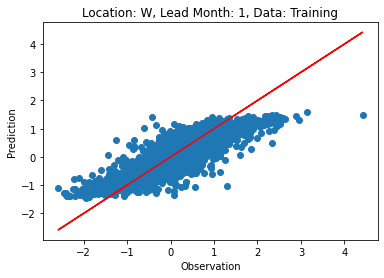

Training Model 4
Epoch [20/400], Avg Loss: 4.9054,  Val MSE: 0.5898
Epoch [40/400], Avg Loss: 1.0931,  Val MSE: 0.5110
Epoch [60/400], Avg Loss: 0.7064,  Val MSE: 0.4743
Epoch [80/400], Avg Loss: 0.6258,  Val MSE: 0.4670
Epoch [100/400], Avg Loss: 0.5859,  Val MSE: 0.4706
Epoch [120/400], Avg Loss: 0.5611,  Val MSE: 0.4742
Epoch [140/400], Avg Loss: 0.5431,  Val MSE: 0.4774
Epoch [160/400], Avg Loss: 0.5297,  Val MSE: 0.4814
Epoch [180/400], Avg Loss: 0.5187,  Val MSE: 0.4849
Epoch [200/400], Avg Loss: 0.5099,  Val MSE: 0.4887
Epoch [220/400], Avg Loss: 0.5023,  Val MSE: 0.4915
Epoch [240/400], Avg Loss: 0.4957,  Val MSE: 0.4935
Epoch [260/400], Avg Loss: 0.4903,  Val MSE: 0.4947
Epoch [280/400], Avg Loss: 0.4860,  Val MSE: 0.4959
Epoch [300/400], Avg Loss: 0.4828,  Val MSE: 0.4970
Epoch [320/400], Avg Loss: 0.4805,  Val MSE: 0.4979
Epoch [340/400], Avg Loss: 0.4789,  Val MSE: 0.4988
Epoch [360/400], Avg Loss: 0.4778,  Val MSE: 0.4996
Epoch [380/400], Avg Loss: 0.4766,  Val MSE: 0.5006

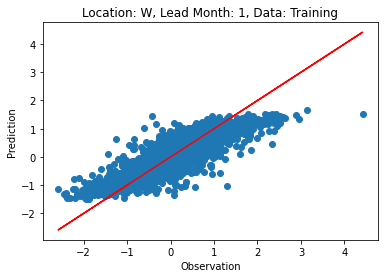

Training Model 5
Epoch [20/400], Avg Loss: 4.9498,  Val MSE: 0.5859
Epoch [40/400], Avg Loss: 1.1605,  Val MSE: 0.5177
Epoch [60/400], Avg Loss: 0.7413,  Val MSE: 0.4773
Epoch [80/400], Avg Loss: 0.6388,  Val MSE: 0.4707
Epoch [100/400], Avg Loss: 0.5910,  Val MSE: 0.4759
Epoch [120/400], Avg Loss: 0.5604,  Val MSE: 0.4808
Epoch [140/400], Avg Loss: 0.5402,  Val MSE: 0.4847
Epoch [160/400], Avg Loss: 0.5266,  Val MSE: 0.4889
Epoch [180/400], Avg Loss: 0.5156,  Val MSE: 0.4926
Epoch [200/400], Avg Loss: 0.5064,  Val MSE: 0.4960
Epoch [220/400], Avg Loss: 0.4997,  Val MSE: 0.4996
Epoch [240/400], Avg Loss: 0.4944,  Val MSE: 0.5017
Epoch [260/400], Avg Loss: 0.4900,  Val MSE: 0.5029
Epoch [280/400], Avg Loss: 0.4870,  Val MSE: 0.5038
Epoch [300/400], Avg Loss: 0.4853,  Val MSE: 0.5044
Epoch [320/400], Avg Loss: 0.4844,  Val MSE: 0.5051
Epoch [340/400], Avg Loss: 0.4834,  Val MSE: 0.5058
Epoch [360/400], Avg Loss: 0.4823,  Val MSE: 0.5063
Epoch [380/400], Avg Loss: 0.4811,  Val MSE: 0.5068

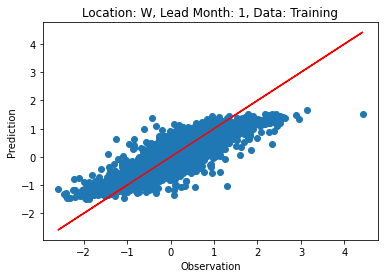

Location: W
Persistence MSE: 0.4578
Test MSE: 0.5086
Persist CSI: 0.4607
Persist CSI 80: 0.5541
Test CSI: 0.2500
Test CSI 80: 0.4755


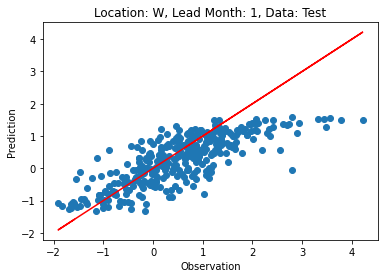

Location: F
90th Threshold: 1.1551478
80th Threshold: 0.71359485
Training Model 1
Epoch [20/400], Avg Loss: 4.8650,  Val MSE: 0.3612
Epoch [40/400], Avg Loss: 1.0369,  Val MSE: 0.3203
Epoch [60/400], Avg Loss: 0.6441,  Val MSE: 0.3074
Epoch [80/400], Avg Loss: 0.5643,  Val MSE: 0.2997
Epoch [100/400], Avg Loss: 0.5237,  Val MSE: 0.2967
Epoch [120/400], Avg Loss: 0.5000,  Val MSE: 0.2990
Epoch [140/400], Avg Loss: 0.4814,  Val MSE: 0.3031
Epoch [160/400], Avg Loss: 0.4683,  Val MSE: 0.3062
Epoch [180/400], Avg Loss: 0.4567,  Val MSE: 0.3085
Epoch [200/400], Avg Loss: 0.4476,  Val MSE: 0.3102
Epoch [220/400], Avg Loss: 0.4408,  Val MSE: 0.3114
Epoch [240/400], Avg Loss: 0.4364,  Val MSE: 0.3125
Epoch [260/400], Avg Loss: 0.4326,  Val MSE: 0.3135
Epoch [280/400], Avg Loss: 0.4295,  Val MSE: 0.3142
Epoch [300/400], Avg Loss: 0.4263,  Val MSE: 0.3147
Epoch [320/400], Avg Loss: 0.4231,  Val MSE: 0.3152
Epoch [340/400], Avg Loss: 0.4211,  Val MSE: 0.3153
Epoch [360/400], Avg Loss: 0.4198,  Va

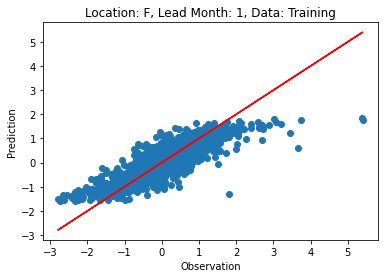

Training Model 2
Epoch [20/400], Avg Loss: 4.9057,  Val MSE: 0.3528
Epoch [40/400], Avg Loss: 1.0403,  Val MSE: 0.3201
Epoch [60/400], Avg Loss: 0.6593,  Val MSE: 0.3061
Epoch [80/400], Avg Loss: 0.5733,  Val MSE: 0.2983
Epoch [100/400], Avg Loss: 0.5264,  Val MSE: 0.2964
Epoch [120/400], Avg Loss: 0.4977,  Val MSE: 0.2986
Epoch [140/400], Avg Loss: 0.4781,  Val MSE: 0.3021
Epoch [160/400], Avg Loss: 0.4649,  Val MSE: 0.3047
Epoch [180/400], Avg Loss: 0.4548,  Val MSE: 0.3062
Epoch [200/400], Avg Loss: 0.4462,  Val MSE: 0.3073
Epoch [220/400], Avg Loss: 0.4397,  Val MSE: 0.3082
Epoch [240/400], Avg Loss: 0.4354,  Val MSE: 0.3089
Epoch [260/400], Avg Loss: 0.4317,  Val MSE: 0.3096
Epoch [280/400], Avg Loss: 0.4282,  Val MSE: 0.3101
Epoch [300/400], Avg Loss: 0.4255,  Val MSE: 0.3105
Epoch [320/400], Avg Loss: 0.4238,  Val MSE: 0.3110
Epoch [340/400], Avg Loss: 0.4223,  Val MSE: 0.3114
Epoch [360/400], Avg Loss: 0.4209,  Val MSE: 0.3117
Epoch [380/400], Avg Loss: 0.4198,  Val MSE: 0.3122

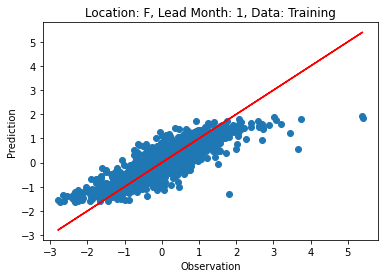

Training Model 3
Epoch [20/400], Avg Loss: 4.8844,  Val MSE: 0.3450
Epoch [40/400], Avg Loss: 1.0783,  Val MSE: 0.3216
Epoch [60/400], Avg Loss: 0.6740,  Val MSE: 0.3090
Epoch [80/400], Avg Loss: 0.5669,  Val MSE: 0.3007
Epoch [100/400], Avg Loss: 0.5230,  Val MSE: 0.2984
Epoch [120/400], Avg Loss: 0.5017,  Val MSE: 0.3023
Epoch [140/400], Avg Loss: 0.4868,  Val MSE: 0.3058
Epoch [160/400], Avg Loss: 0.4732,  Val MSE: 0.3078
Epoch [180/400], Avg Loss: 0.4640,  Val MSE: 0.3091
Epoch [200/400], Avg Loss: 0.4579,  Val MSE: 0.3102
Epoch [220/400], Avg Loss: 0.4538,  Val MSE: 0.3110
Epoch [240/400], Avg Loss: 0.4502,  Val MSE: 0.3119
Epoch [260/400], Avg Loss: 0.4475,  Val MSE: 0.3125
Epoch [280/400], Avg Loss: 0.4457,  Val MSE: 0.3130
Epoch [300/400], Avg Loss: 0.4439,  Val MSE: 0.3135
Epoch [320/400], Avg Loss: 0.4421,  Val MSE: 0.3138
Epoch [340/400], Avg Loss: 0.4408,  Val MSE: 0.3140
Epoch [360/400], Avg Loss: 0.4401,  Val MSE: 0.3143
Epoch [380/400], Avg Loss: 0.4394,  Val MSE: 0.3145

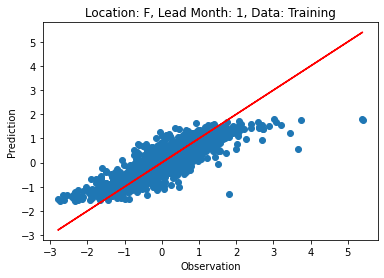

Training Model 4
Epoch [20/400], Avg Loss: 4.8678,  Val MSE: 0.3520
Epoch [40/400], Avg Loss: 1.0627,  Val MSE: 0.3210
Epoch [60/400], Avg Loss: 0.6543,  Val MSE: 0.3083
Epoch [80/400], Avg Loss: 0.5600,  Val MSE: 0.3003
Epoch [100/400], Avg Loss: 0.5130,  Val MSE: 0.2991
Epoch [120/400], Avg Loss: 0.4858,  Val MSE: 0.3018
Epoch [140/400], Avg Loss: 0.4654,  Val MSE: 0.3050
Epoch [160/400], Avg Loss: 0.4541,  Val MSE: 0.3070
Epoch [180/400], Avg Loss: 0.4478,  Val MSE: 0.3088
Epoch [200/400], Avg Loss: 0.4433,  Val MSE: 0.3103
Epoch [220/400], Avg Loss: 0.4398,  Val MSE: 0.3117
Epoch [240/400], Avg Loss: 0.4358,  Val MSE: 0.3125
Epoch [260/400], Avg Loss: 0.4322,  Val MSE: 0.3132
Epoch [280/400], Avg Loss: 0.4300,  Val MSE: 0.3138
Epoch [300/400], Avg Loss: 0.4280,  Val MSE: 0.3144
Epoch [320/400], Avg Loss: 0.4261,  Val MSE: 0.3149
Epoch [340/400], Avg Loss: 0.4239,  Val MSE: 0.3154
Epoch [360/400], Avg Loss: 0.4217,  Val MSE: 0.3155
Epoch [380/400], Avg Loss: 0.4197,  Val MSE: 0.3157

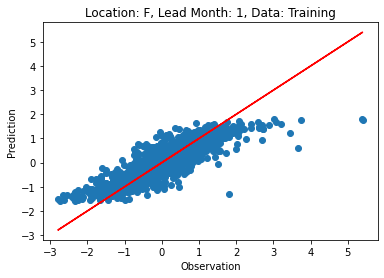

Training Model 5
Epoch [20/400], Avg Loss: 4.8935,  Val MSE: 0.3545
Epoch [40/400], Avg Loss: 1.1020,  Val MSE: 0.3232
Epoch [60/400], Avg Loss: 0.6793,  Val MSE: 0.3099
Epoch [80/400], Avg Loss: 0.5851,  Val MSE: 0.3007
Epoch [100/400], Avg Loss: 0.5410,  Val MSE: 0.2960
Epoch [120/400], Avg Loss: 0.5160,  Val MSE: 0.2954
Epoch [140/400], Avg Loss: 0.4967,  Val MSE: 0.2978
Epoch [160/400], Avg Loss: 0.4811,  Val MSE: 0.3014
Epoch [180/400], Avg Loss: 0.4673,  Val MSE: 0.3047
Epoch [200/400], Avg Loss: 0.4561,  Val MSE: 0.3072
Epoch [220/400], Avg Loss: 0.4461,  Val MSE: 0.3090
Epoch [240/400], Avg Loss: 0.4377,  Val MSE: 0.3105
Epoch [260/400], Avg Loss: 0.4306,  Val MSE: 0.3116
Epoch [280/400], Avg Loss: 0.4247,  Val MSE: 0.3121
Epoch [300/400], Avg Loss: 0.4202,  Val MSE: 0.3124
Epoch [320/400], Avg Loss: 0.4183,  Val MSE: 0.3125
Epoch [340/400], Avg Loss: 0.4173,  Val MSE: 0.3128
Epoch [360/400], Avg Loss: 0.4166,  Val MSE: 0.3132
Epoch [380/400], Avg Loss: 0.4163,  Val MSE: 0.3133

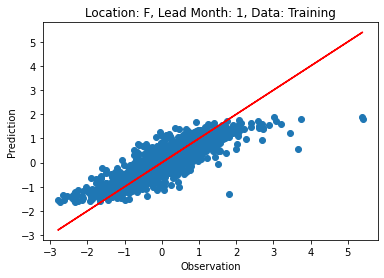

Location: F
Persistence MSE: 0.3402
Test MSE: 0.3143
Persist CSI: 0.4699
Persist CSI 80: 0.5500
Test CSI: 0.3611
Test CSI 80: 0.5752


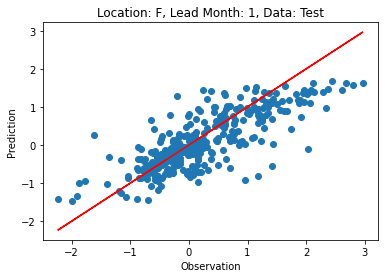

Location: CI
90th Threshold: 1.3186705
80th Threshold: 0.7413428
Training Model 1
Epoch [20/400], Avg Loss: 4.7997,  Val MSE: 0.3256
Epoch [40/400], Avg Loss: 0.9851,  Val MSE: 0.2778
Epoch [60/400], Avg Loss: 0.6090,  Val MSE: 0.2645
Epoch [80/400], Avg Loss: 0.5372,  Val MSE: 0.2602
Epoch [100/400], Avg Loss: 0.4987,  Val MSE: 0.2571
Epoch [120/400], Avg Loss: 0.4746,  Val MSE: 0.2556
Epoch [140/400], Avg Loss: 0.4583,  Val MSE: 0.2552
Epoch [160/400], Avg Loss: 0.4470,  Val MSE: 0.2554
Epoch [180/400], Avg Loss: 0.4381,  Val MSE: 0.2556
Epoch [200/400], Avg Loss: 0.4310,  Val MSE: 0.2561
Epoch [220/400], Avg Loss: 0.4250,  Val MSE: 0.2566
Epoch [240/400], Avg Loss: 0.4200,  Val MSE: 0.2573
Epoch [260/400], Avg Loss: 0.4148,  Val MSE: 0.2579
Epoch [280/400], Avg Loss: 0.4101,  Val MSE: 0.2582
Epoch [300/400], Avg Loss: 0.4052,  Val MSE: 0.2585
Epoch [320/400], Avg Loss: 0.4006,  Val MSE: 0.2586
Epoch [340/400], Avg Loss: 0.3968,  Val MSE: 0.2587
Epoch [360/400], Avg Loss: 0.3936,  Va

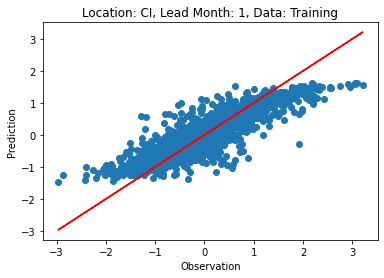

Training Model 2
Epoch [20/400], Avg Loss: 4.8370,  Val MSE: 0.3322
Epoch [40/400], Avg Loss: 0.9931,  Val MSE: 0.2802
Epoch [60/400], Avg Loss: 0.6050,  Val MSE: 0.2646
Epoch [80/400], Avg Loss: 0.5272,  Val MSE: 0.2608
Epoch [100/400], Avg Loss: 0.4946,  Val MSE: 0.2586
Epoch [120/400], Avg Loss: 0.4731,  Val MSE: 0.2573
Epoch [140/400], Avg Loss: 0.4568,  Val MSE: 0.2562
Epoch [160/400], Avg Loss: 0.4444,  Val MSE: 0.2557
Epoch [180/400], Avg Loss: 0.4354,  Val MSE: 0.2556
Epoch [200/400], Avg Loss: 0.4281,  Val MSE: 0.2556
Epoch [220/400], Avg Loss: 0.4230,  Val MSE: 0.2556
Epoch [240/400], Avg Loss: 0.4194,  Val MSE: 0.2558
Epoch [260/400], Avg Loss: 0.4166,  Val MSE: 0.2561
Epoch [280/400], Avg Loss: 0.4142,  Val MSE: 0.2565
Epoch [300/400], Avg Loss: 0.4119,  Val MSE: 0.2569
Epoch [320/400], Avg Loss: 0.4096,  Val MSE: 0.2573
Epoch [340/400], Avg Loss: 0.4074,  Val MSE: 0.2579
Epoch [360/400], Avg Loss: 0.4048,  Val MSE: 0.2584
Epoch [380/400], Avg Loss: 0.4021,  Val MSE: 0.2589

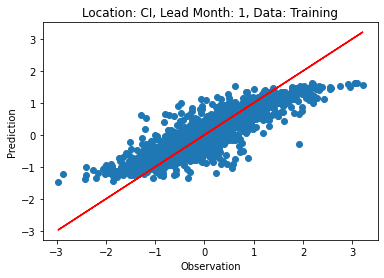

Training Model 3
Epoch [20/400], Avg Loss: 4.8556,  Val MSE: 0.3353
Epoch [40/400], Avg Loss: 1.0526,  Val MSE: 0.2791
Epoch [60/400], Avg Loss: 0.6364,  Val MSE: 0.2643
Epoch [80/400], Avg Loss: 0.5612,  Val MSE: 0.2612
Epoch [100/400], Avg Loss: 0.5155,  Val MSE: 0.2585
Epoch [120/400], Avg Loss: 0.4849,  Val MSE: 0.2563
Epoch [140/400], Avg Loss: 0.4625,  Val MSE: 0.2552
Epoch [160/400], Avg Loss: 0.4461,  Val MSE: 0.2549
Epoch [180/400], Avg Loss: 0.4346,  Val MSE: 0.2550
Epoch [200/400], Avg Loss: 0.4266,  Val MSE: 0.2553
Epoch [220/400], Avg Loss: 0.4195,  Val MSE: 0.2557
Epoch [240/400], Avg Loss: 0.4133,  Val MSE: 0.2562
Epoch [260/400], Avg Loss: 0.4079,  Val MSE: 0.2565
Epoch [280/400], Avg Loss: 0.4042,  Val MSE: 0.2568
Epoch [300/400], Avg Loss: 0.4011,  Val MSE: 0.2569
Epoch [320/400], Avg Loss: 0.3988,  Val MSE: 0.2571
Epoch [340/400], Avg Loss: 0.3973,  Val MSE: 0.2573
Epoch [360/400], Avg Loss: 0.3957,  Val MSE: 0.2575
Epoch [380/400], Avg Loss: 0.3937,  Val MSE: 0.2578

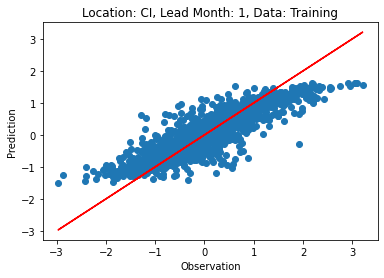

Training Model 4
Epoch [20/400], Avg Loss: 4.8433,  Val MSE: 0.3244
Epoch [40/400], Avg Loss: 1.0386,  Val MSE: 0.2779
Epoch [60/400], Avg Loss: 0.6445,  Val MSE: 0.2647
Epoch [80/400], Avg Loss: 0.5611,  Val MSE: 0.2614
Epoch [100/400], Avg Loss: 0.5149,  Val MSE: 0.2584
Epoch [120/400], Avg Loss: 0.4843,  Val MSE: 0.2564
Epoch [140/400], Avg Loss: 0.4652,  Val MSE: 0.2554
Epoch [160/400], Avg Loss: 0.4513,  Val MSE: 0.2554
Epoch [180/400], Avg Loss: 0.4402,  Val MSE: 0.2555
Epoch [200/400], Avg Loss: 0.4301,  Val MSE: 0.2558
Epoch [220/400], Avg Loss: 0.4220,  Val MSE: 0.2564
Epoch [240/400], Avg Loss: 0.4147,  Val MSE: 0.2570
Epoch [260/400], Avg Loss: 0.4088,  Val MSE: 0.2575
Epoch [280/400], Avg Loss: 0.4042,  Val MSE: 0.2577
Epoch [300/400], Avg Loss: 0.4005,  Val MSE: 0.2579
Epoch [320/400], Avg Loss: 0.3980,  Val MSE: 0.2582
Epoch [340/400], Avg Loss: 0.3957,  Val MSE: 0.2583
Epoch [360/400], Avg Loss: 0.3936,  Val MSE: 0.2585
Epoch [380/400], Avg Loss: 0.3921,  Val MSE: 0.2586

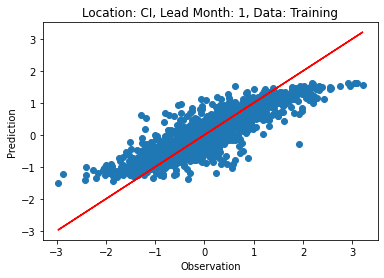

Training Model 5
Epoch [20/400], Avg Loss: 4.7700,  Val MSE: 0.3241
Epoch [40/400], Avg Loss: 1.0095,  Val MSE: 0.2789
Epoch [60/400], Avg Loss: 0.6104,  Val MSE: 0.2646
Epoch [80/400], Avg Loss: 0.5336,  Val MSE: 0.2610
Epoch [100/400], Avg Loss: 0.4973,  Val MSE: 0.2588
Epoch [120/400], Avg Loss: 0.4712,  Val MSE: 0.2575
Epoch [140/400], Avg Loss: 0.4555,  Val MSE: 0.2566
Epoch [160/400], Avg Loss: 0.4454,  Val MSE: 0.2565
Epoch [180/400], Avg Loss: 0.4360,  Val MSE: 0.2564
Epoch [200/400], Avg Loss: 0.4278,  Val MSE: 0.2566
Epoch [220/400], Avg Loss: 0.4219,  Val MSE: 0.2570
Epoch [240/400], Avg Loss: 0.4167,  Val MSE: 0.2573
Epoch [260/400], Avg Loss: 0.4123,  Val MSE: 0.2575
Epoch [280/400], Avg Loss: 0.4097,  Val MSE: 0.2577
Epoch [300/400], Avg Loss: 0.4079,  Val MSE: 0.2579
Epoch [320/400], Avg Loss: 0.4060,  Val MSE: 0.2579
Epoch [340/400], Avg Loss: 0.4040,  Val MSE: 0.2579
Epoch [360/400], Avg Loss: 0.4023,  Val MSE: 0.2580
Epoch [380/400], Avg Loss: 0.4006,  Val MSE: 0.2582

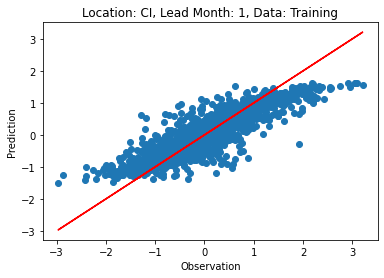

Location: CI
Persistence MSE: 0.3095
Test MSE: 0.2585
Persist CSI: 0.2174
Persist CSI 80: 0.4211
Test CSI: 0.1765
Test CSI 80: 0.3824


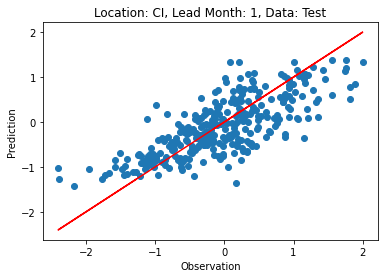

Location: MG
90th Threshold: 1.0850612
80th Threshold: 0.71098405
Training Model 1
Epoch [20/400], Avg Loss: 4.7807,  Val MSE: 0.2881
Epoch [40/400], Avg Loss: 0.9691,  Val MSE: 0.2639
Epoch [60/400], Avg Loss: 0.5926,  Val MSE: 0.2460
Epoch [80/400], Avg Loss: 0.5105,  Val MSE: 0.2383
Epoch [100/400], Avg Loss: 0.4673,  Val MSE: 0.2354
Epoch [120/400], Avg Loss: 0.4436,  Val MSE: 0.2340
Epoch [140/400], Avg Loss: 0.4283,  Val MSE: 0.2331
Epoch [160/400], Avg Loss: 0.4163,  Val MSE: 0.2326
Epoch [180/400], Avg Loss: 0.4067,  Val MSE: 0.2326
Epoch [200/400], Avg Loss: 0.4001,  Val MSE: 0.2327
Epoch [220/400], Avg Loss: 0.3957,  Val MSE: 0.2332
Epoch [240/400], Avg Loss: 0.3930,  Val MSE: 0.2333
Epoch [260/400], Avg Loss: 0.3900,  Val MSE: 0.2336
Epoch [280/400], Avg Loss: 0.3867,  Val MSE: 0.2339
Epoch [300/400], Avg Loss: 0.3839,  Val MSE: 0.2343
Epoch [320/400], Avg Loss: 0.3807,  Val MSE: 0.2344
Epoch [340/400], Avg Loss: 0.3777,  Val MSE: 0.2346
Epoch [360/400], Avg Loss: 0.3755,  V

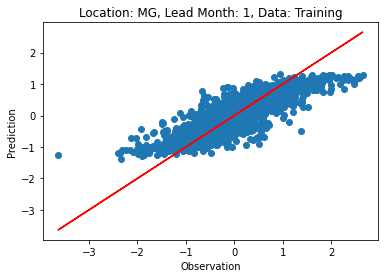

Training Model 2
Epoch [20/400], Avg Loss: 4.8060,  Val MSE: 0.2814
Epoch [40/400], Avg Loss: 0.9922,  Val MSE: 0.2609
Epoch [60/400], Avg Loss: 0.5907,  Val MSE: 0.2450
Epoch [80/400], Avg Loss: 0.5092,  Val MSE: 0.2376
Epoch [100/400], Avg Loss: 0.4759,  Val MSE: 0.2349
Epoch [120/400], Avg Loss: 0.4579,  Val MSE: 0.2336
Epoch [140/400], Avg Loss: 0.4465,  Val MSE: 0.2330
Epoch [160/400], Avg Loss: 0.4367,  Val MSE: 0.2328
Epoch [180/400], Avg Loss: 0.4287,  Val MSE: 0.2327
Epoch [200/400], Avg Loss: 0.4224,  Val MSE: 0.2325
Epoch [220/400], Avg Loss: 0.4178,  Val MSE: 0.2327
Epoch [240/400], Avg Loss: 0.4131,  Val MSE: 0.2331
Epoch [260/400], Avg Loss: 0.4087,  Val MSE: 0.2333
Epoch [280/400], Avg Loss: 0.4042,  Val MSE: 0.2337
Epoch [300/400], Avg Loss: 0.3993,  Val MSE: 0.2340
Epoch [320/400], Avg Loss: 0.3947,  Val MSE: 0.2342
Epoch [340/400], Avg Loss: 0.3906,  Val MSE: 0.2345
Epoch [360/400], Avg Loss: 0.3873,  Val MSE: 0.2346
Epoch [380/400], Avg Loss: 0.3840,  Val MSE: 0.2346

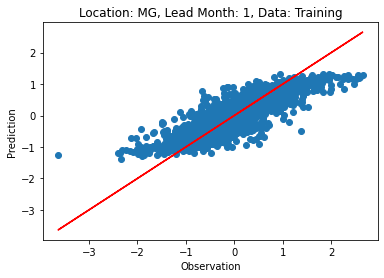

Training Model 3
Epoch [20/400], Avg Loss: 4.8115,  Val MSE: 0.2897
Epoch [40/400], Avg Loss: 1.0271,  Val MSE: 0.2643
Epoch [60/400], Avg Loss: 0.6324,  Val MSE: 0.2467
Epoch [80/400], Avg Loss: 0.5322,  Val MSE: 0.2388
Epoch [100/400], Avg Loss: 0.4845,  Val MSE: 0.2364
Epoch [120/400], Avg Loss: 0.4569,  Val MSE: 0.2349
Epoch [140/400], Avg Loss: 0.4402,  Val MSE: 0.2340
Epoch [160/400], Avg Loss: 0.4296,  Val MSE: 0.2336
Epoch [180/400], Avg Loss: 0.4215,  Val MSE: 0.2334
Epoch [200/400], Avg Loss: 0.4157,  Val MSE: 0.2333
Epoch [220/400], Avg Loss: 0.4116,  Val MSE: 0.2333
Epoch [240/400], Avg Loss: 0.4081,  Val MSE: 0.2333
Epoch [260/400], Avg Loss: 0.4045,  Val MSE: 0.2334
Epoch [280/400], Avg Loss: 0.4007,  Val MSE: 0.2335
Epoch [300/400], Avg Loss: 0.3975,  Val MSE: 0.2337
Epoch [320/400], Avg Loss: 0.3947,  Val MSE: 0.2337
Epoch [340/400], Avg Loss: 0.3926,  Val MSE: 0.2338
Epoch [360/400], Avg Loss: 0.3911,  Val MSE: 0.2338
Epoch [380/400], Avg Loss: 0.3899,  Val MSE: 0.2339

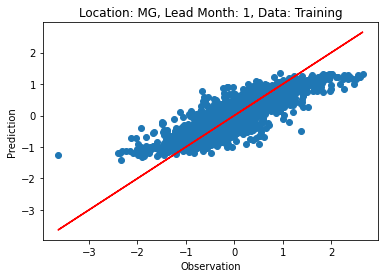

Training Model 4
Epoch [20/400], Avg Loss: 4.7944,  Val MSE: 0.2913
Epoch [40/400], Avg Loss: 0.9689,  Val MSE: 0.2634
Epoch [60/400], Avg Loss: 0.5981,  Val MSE: 0.2463
Epoch [80/400], Avg Loss: 0.5194,  Val MSE: 0.2392
Epoch [100/400], Avg Loss: 0.4766,  Val MSE: 0.2362
Epoch [120/400], Avg Loss: 0.4501,  Val MSE: 0.2348
Epoch [140/400], Avg Loss: 0.4324,  Val MSE: 0.2341
Epoch [160/400], Avg Loss: 0.4173,  Val MSE: 0.2338
Epoch [180/400], Avg Loss: 0.4070,  Val MSE: 0.2338
Epoch [200/400], Avg Loss: 0.3999,  Val MSE: 0.2338
Epoch [220/400], Avg Loss: 0.3948,  Val MSE: 0.2338
Epoch [240/400], Avg Loss: 0.3908,  Val MSE: 0.2338
Epoch [260/400], Avg Loss: 0.3882,  Val MSE: 0.2339
Epoch [280/400], Avg Loss: 0.3864,  Val MSE: 0.2339
Epoch [300/400], Avg Loss: 0.3849,  Val MSE: 0.2340
Epoch [320/400], Avg Loss: 0.3837,  Val MSE: 0.2341
Epoch [340/400], Avg Loss: 0.3828,  Val MSE: 0.2342
Epoch [360/400], Avg Loss: 0.3820,  Val MSE: 0.2342
Epoch [380/400], Avg Loss: 0.3814,  Val MSE: 0.2344

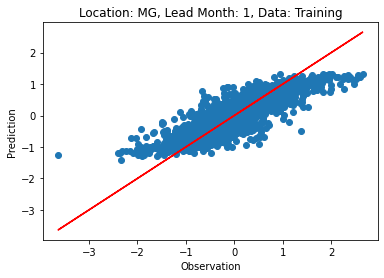

Training Model 5
Epoch [20/400], Avg Loss: 4.7896,  Val MSE: 0.2924
Epoch [40/400], Avg Loss: 0.9749,  Val MSE: 0.2612
Epoch [60/400], Avg Loss: 0.6036,  Val MSE: 0.2437
Epoch [80/400], Avg Loss: 0.5354,  Val MSE: 0.2376
Epoch [100/400], Avg Loss: 0.4968,  Val MSE: 0.2354
Epoch [120/400], Avg Loss: 0.4726,  Val MSE: 0.2344
Epoch [140/400], Avg Loss: 0.4547,  Val MSE: 0.2338
Epoch [160/400], Avg Loss: 0.4409,  Val MSE: 0.2336
Epoch [180/400], Avg Loss: 0.4301,  Val MSE: 0.2335
Epoch [200/400], Avg Loss: 0.4215,  Val MSE: 0.2335
Epoch [220/400], Avg Loss: 0.4144,  Val MSE: 0.2335
Epoch [240/400], Avg Loss: 0.4091,  Val MSE: 0.2338
Epoch [260/400], Avg Loss: 0.4048,  Val MSE: 0.2339
Epoch [280/400], Avg Loss: 0.4018,  Val MSE: 0.2341
Epoch [300/400], Avg Loss: 0.3988,  Val MSE: 0.2343
Epoch [320/400], Avg Loss: 0.3960,  Val MSE: 0.2344
Epoch [340/400], Avg Loss: 0.3930,  Val MSE: 0.2345
Epoch [360/400], Avg Loss: 0.3894,  Val MSE: 0.2346
Epoch [380/400], Avg Loss: 0.3858,  Val MSE: 0.2348

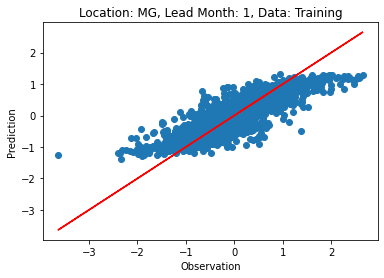

Location: MG
Persistence MSE: 0.2668
Test MSE: 0.2346
Persist CSI: 0.4386
Persist CSI 80: 0.3750
Test CSI: 0.2045
Test CSI 80: 0.3832


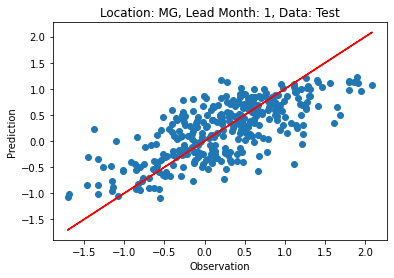

In [38]:
net_class = 'FCN'
num_layer = 2
num_hid_feat = 100
num_hid_feat_2 = 50
num_out_feat = 1
window_size = 6
train_split = 0.8
loss_function = 'MSE'
activation = 'tanh'
optimizer = 'SGD'
learning_rate = 0.01
weight_decay = 0.01
l1_ratio = 1
regularization = 'EN' + str(l1_ratio) + str(weight_decay)
drop_out_rate = 0
batch_size = 64
num_train_epochs = 400

data_path = 'data/'
models_path = 'out/'
out_path = 'out/'

num_var = 20

class FCN(nn.Module):
    def __init__(self, num_input_feat, num_hid_feat, num_hid_feat_2, num_out_feat, drop_out_rate):
        super(FCN, self).__init__()
        self.fc1 = nn.Linear(num_input_feat, num_hid_feat)
        self.fc2 = nn.Linear(num_hid_feat, num_hid_feat)
        self.fc3 = nn.Linear(num_hid_feat, num_hid_feat_2)
        self.fc4 = nn.Linear(num_hid_feat_2, num_out_feat)
        self.dropout = nn.Dropout(drop_out_rate)

    def forward(self, x):
        x = torch.tanh(self.fc1(x))
        x = self.dropout(x)
        x = torch.tanh(self.fc2(x))
        x = self.dropout(x)
        x = torch.tanh(self.fc3(x))
        x = self.dropout(x)
        x = self.fc4(x)
        return x

for lead_time in [1]:

    lead_time = lead_time
    num_sample = 1680-window_size-lead_time+1 # max: node_features.shape[1]-window_size-lead_time+1

    all_loc = []
    all_persist_mse = []
    all_test_mse = []
    all_persist_csi = []
    all_persist_csi_80 = []
    all_test_csi = []
    all_test_csi_80 = []
    all_training_time = []

    for loc in list(nz.keys()):
        
        all_preds = []
        all_time = []

        print('Location:', loc.upper())
        
        for model_num in range(5):

            y = nz[loc]
            y_all = y

            x_all = [np.column_stack([predictors[list(predictors.keys())[i]][j:j+window_size] for i in range(num_var)]) for j in range(len(y)-window_size-lead_time)]
            y_all = [y[j+window_size+lead_time-1] for j in range(len(y)-window_size-lead_time)]
            x_all = np.swapaxes(x_all, 1, 2)
            x_all_flat = np.array(x_all).reshape(-1, num_var*6)
            y_all = np.array(y_all)

            num_train = int(len(x_all) * train_split)
            x_train, y_train = torch.tensor(x_all_flat[:num_train]).to(torch.float32), torch.tensor(y_all[:num_train]).to(torch.float32)
            x_test, y_test = torch.tensor(x_all_flat[num_train:]).to(torch.float32), torch.tensor(y_all[num_train:]).to(torch.float32)

            # The threshold for defining outliers using the 90th percentile
            y_train_sorted = np.sort(y_train.numpy().squeeze())
            threshold = y_train_sorted[int(len(y_train_sorted)*0.9):][0]
            threshold_low = y_train_sorted[int(len(y_train_sorted)*0.8):][0]
            if model_num == 0:
                print('90th Threshold:', threshold)
                print('80th Threshold:', threshold_low)

            model = FCN(x_all_flat.shape[1], num_hid_feat, num_hid_feat_2, num_out_feat, drop_out_rate)
            optim = torch.optim.SGD(model.parameters(), lr=learning_rate, weight_decay=weight_decay)
            criterion = nn.MSELoss()

            print('Training Model {}'.format(model_num+1))

            # Start time
            start = time.time()

            for epoch in range(num_train_epochs):
                epoch_loss = 0
                for i in range(0, len(x_train), batch_size):
                    x_batch = x_train[i:i+batch_size]
                    y_batch = y_train[i:i+batch_size]
                    y_pred = model(x_batch)

                    loss = criterion(y_pred, y_batch)
                    
                    # Elastic Net Reg
                    # l1_ratio = 0 is the L2 reg.
                    # l1_ratio = 1 is the L1 reg.
                    l1_reg = 0.0
                    l2_reg = 0.0
                    for param in model.parameters():
                        l1_reg += torch.norm(param, 1)
                        l2_reg += torch.norm(param, 2)
                    loss += weight_decay * (l1_ratio * l1_reg + (1 - l1_ratio) * l2_reg)
                    optim.zero_grad()
                    loss.backward()
                    optim.step()
                    if (epoch+1) % 20 == 0:
                        #print('Batch [{}/{}], Loss: {:.4f}'.format((i//batch_size)+1, len(x_train)//batch_size, loss.item()))
                        epoch_loss += loss.item()
                with torch.no_grad():
                    y_pred = model(x_test)
                    val_mse = criterion(y_pred, y_test)     
                if (epoch+1) % 20 == 0:
                    epoch_loss /= len(x_train) // batch_size   
                    print('Epoch [{}/{}], Avg Loss: {:.4f},  Val MSE: {:.4f}'.format(epoch+1, num_train_epochs, epoch_loss, val_mse))

            # End time
            stop = time.time()
            training_time = float(stop - start)
            all_time.append(training_time)

            with torch.no_grad():
                y_pred = model(x_train)

            plt.scatter(y_train, y_pred)
            x = y_train
            y = y_train
            plt.plot(x, y, color='red')
            plt.xlabel('Observation')
            plt.ylabel('Prediction')
            plt.title('Location: {}, Lead Month: {}, Data: Training'.format(loc.upper(), lead_time))
            plt.show()

            with torch.no_grad():
                persist_mse = criterion(y_test[:-lead_time], y_test[lead_time:])
                y_pred = model(x_test)
                all_preds.append(y_pred.numpy())
        
        sum_preds = np.add.reduce(all_preds)
        avg_preds = sum_preds / (model_num + 1)

        print('Location:', loc.upper())

        test_mse = criterion(torch.tensor(avg_preds), y_test)
        print('Persistence MSE: {:.4f}'.format(persist_mse.item()))
        print('Test MSE: {:.4f}'.format(test_mse.item()))

        pred_pos = [float(i) > threshold for i in y_test[:-lead_time]]
        y_test_pos = [float(i) > threshold for i in y_test[lead_time:]]
        persist_pos = [[pred_pos[i], y_test_pos[i]] for i in range(len(pred_pos))]
        persist_csi = persist_pos.count([np.array([True]), np.array([True])]) / (persist_pos.count([np.array([True]), np.array([True])]) + persist_pos.count([np.array([True]), np.array([False])]) + persist_pos.count([np.array([False]), np.array([True])]))
        print('Persist CSI: {:.4f}'.format(persist_csi))
        pred_pos = [float(i) > threshold_low for i in y_test[:-lead_time]]
        y_test_pos = [float(i) > threshold_low for i in y_test[lead_time:]]
        persist_pos = [[pred_pos[i], y_test_pos[i]] for i in range(len(pred_pos))]
        persist_csi_80 = persist_pos.count([np.array([True]), np.array([True])]) / (persist_pos.count([np.array([True]), np.array([True])]) + persist_pos.count([np.array([True]), np.array([False])]) + persist_pos.count([np.array([False]), np.array([True])]))
        print('Persist CSI 80: {:.4f}'.format(persist_csi_80))
        
        pred_pos = [float(i) > threshold for i in avg_preds]
        y_test_pos = [float(i) > threshold for i in y_test]
        test_pos = [[pred_pos[i], y_test_pos[i]] for i in range(len(avg_preds))]
        test_csi = test_pos.count([np.array([True]), np.array([True])]) / (test_pos.count([np.array([True]), np.array([True])]) + test_pos.count([np.array([True]), np.array([False])]) + test_pos.count([np.array([False]), np.array([True])]))
        print('Test CSI: {:.4f}'.format(test_csi))
        pred_pos = [float(i) > threshold_low for i in avg_preds]
        y_test_pos = [float(i) > threshold_low for i in y_test]
        test_pos = [[pred_pos[i], y_test_pos[i]] for i in range(len(avg_preds))]
        test_csi_80 = test_pos.count([np.array([True]), np.array([True])]) / (test_pos.count([np.array([True]), np.array([True])]) + test_pos.count([np.array([True]), np.array([False])]) + test_pos.count([np.array([False]), np.array([True])]))
        print('Test CSI 80: {:.4f}'.format(test_csi_80))

        plt.scatter(y_test, avg_preds)
        x = y_test
        y = y_test
        plt.plot(x, y, color='red')
        plt.xlabel('Observation')
        plt.ylabel('Prediction')
        plt.title('Location: {}, Lead Month: {}, Data: Test'.format(loc.upper(), lead_time))
        plt.show()

        all_loc.append(loc.upper())
        all_persist_mse.append(persist_mse)
        all_test_mse.append(test_mse)
        all_test_csi.append(round(test_csi, 4))
        all_test_csi_80.append(round(test_csi_80, 4))
        all_persist_csi.append(round(persist_csi, 4))
        all_persist_csi_80.append(round(persist_csi_80, 4))
        all_training_time.append(round(sum(all_time) / len(all_time), 4))

In [39]:
all_persist_mse_float = [round(float(i), 4) for i in all_persist_mse]
all_test_mse_float = [round(float(i), 4) for i in all_test_mse]

test_results = pd.DataFrame({'Location': all_loc, 'Persistence MSE': all_persist_mse_float, 'Persist CSI': all_persist_csi, 'Persist CSI 80': all_persist_csi_80, 'Test MSE': all_test_mse_float, 'Test CSI': all_test_csi, 'Test CSI 80': all_test_csi_80, 'Training Time': all_training_time})
test_results = test_results.sort_values(by='Location')
test_results

,Location,Persistence MSE,Persist CSI,Persist CSI 80,Test MSE,Test CSI,Test CSI 80,Training Time
7,BOP,0.1690,0.3846,0.4717,0.1523,0.0714,0.4211,18.7183
6,BP,0.4665,0.1875,0.2949,0.3824,0.1600,0.2857,18.7506
10,CI,0.3095,0.2174,0.4211,0.2585,0.1765,0.3824,18.7348
3,CR,0.2468,0.3286,0.4959,0.2321,0.1373,0.4298,18.8293
1,CS,0.1247,0.4043,0.5327,0.1227,0.3143,0.4737,18.4880
9,F,0.3402,0.4699,0.5500,0.3143,0.3611,0.5752,18.7583
11,MG,0.2668,0.4386,0.3750,0.2346,0.2045,0.3832,18.9417
4,OP,0.3155,0.3478,0.4198,0.2774,0.4103,0.4430,18.7181
0,R,0.2377,0.5158,0.6259,0.2270,0.2055,0.5938,18.6988
2,SI,0.2440,0.4545,0.4646,0.2274,0.4474,0.4646,18.6609
